In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from scipy.stats import shapiro

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# to prevent the scientific notation. 
pd.set_option('display.float_format', lambda x:'%.4f' % x)

In [3]:
# March to End August

file_name_all = 'data/ULAHZ6UJFN_2.csv'

file_name = pd.read_csv(file_name_all)

In [4]:
file_name['province'].value_counts()

JAWA TIMUR     120967
JAWA TENGAH       509
Name: province, dtype: int64

In [5]:
usin= 'ULAHZ6UJFN'

### Feature Engineering

In [6]:
# date time formatting 

# file_name['order_time_jkt'] = file_name['order_date_jkt']
file_name['order_time_jkt']= pd.to_datetime(file_name['order_time_jkt'])
file_name['year'] = file_name['order_time_jkt'].dt.year
file_name['month'] = file_name['order_time_jkt'].dt.month
file_name['year_month'] = pd.to_datetime(file_name['order_time_jkt']).dt.to_period('M')
file_name['day'] = file_name['order_time_jkt'].dt.day
file_name['week'] = file_name['order_time_jkt'].dt.week
file_name['weekday'] = file_name['order_time_jkt'].dt.weekday 
# 0 - Monday, 1- Tuesday

# Derived Columns
file_name['log_quantity'] = file_name['order_quantity'].apply(lambda x: math.log(x))
file_name['log_sp'] = file_name['price_sold_at'].apply(lambda x: math.log(x)).astype('float')

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/823828930.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  file_name['week'] = file_name['order_time_jkt'].dt.week


In [7]:
file_name.head()

,order_time_jkt,usin,order_id,bp,order_month,order_year,price_sold_at,order_quantity,city,province,year,month,year_month,day,week,weekday,log_quantity,log_sp
0,2022-12-20 22:46:07,ULAHZ6UJFN,OD16715511676383,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
1,2022-12-20 22:43:15,ULAHZ6UJFN,OD16715509952644,592500.0000,12,2022,NaN,NaN,GRESIK,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
2,2022-12-20 22:40:47,ULAHZ6UJFN,OD167155084744638,592500.0000,12,2022,NaN,NaN,SIDOARJO,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
3,2022-12-20 22:37:15,ULAHZ6UJFN,OD167155063515853,592500.0000,12,2022,NaN,NaN,KAB. LAMONGAN,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN
4,2022-12-20 22:19:38,ULAHZ6UJFN,OD167154957806591,592500.0000,12,2022,NaN,NaN,SURABAYA,JAWA TIMUR,2022,12,2022-12,20,51,1,NaN,NaN


### Data Cleaning

In [8]:
file_name.groupby(['province']).count()

# Select only Jawa Timur as that's clearly the singlemost biggest province. 
file_name = file_name[file_name['province'] == 'JAWA TIMUR']

# Remove inflated quantities
filtered = file_name[file_name['order_quantity'] <= 40]

### MoM Demand Curve Estimation - Raw Data

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


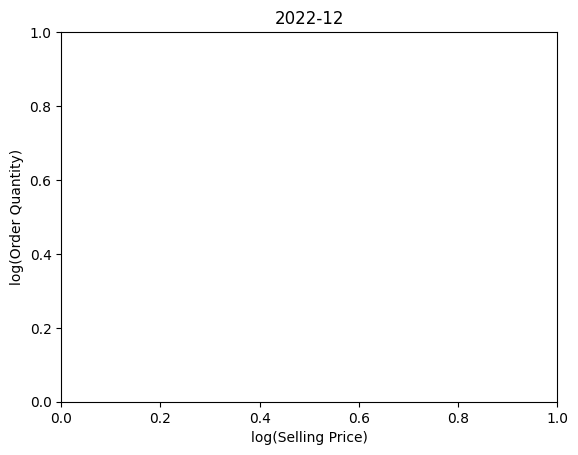

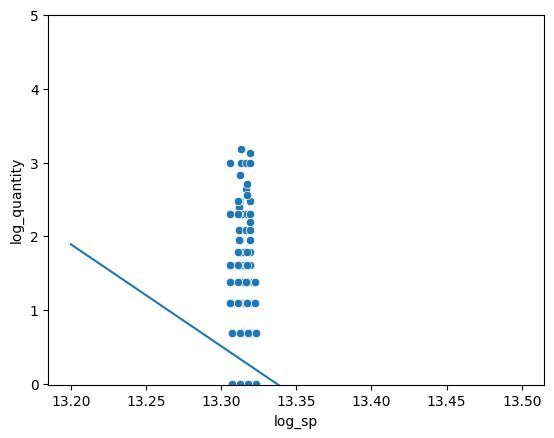

[]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


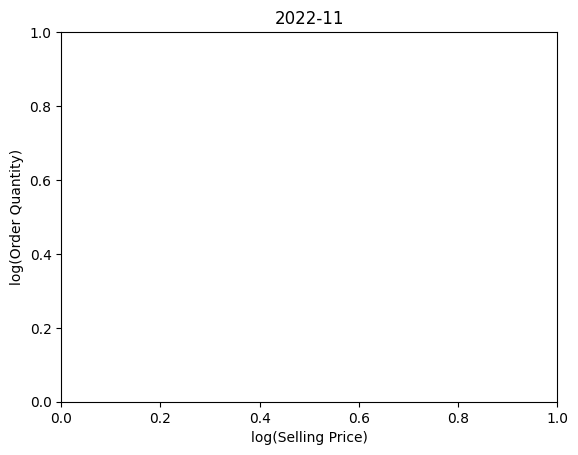

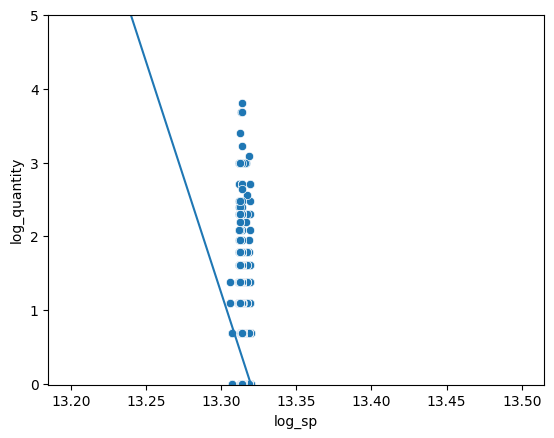

[0.006503949696386235]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


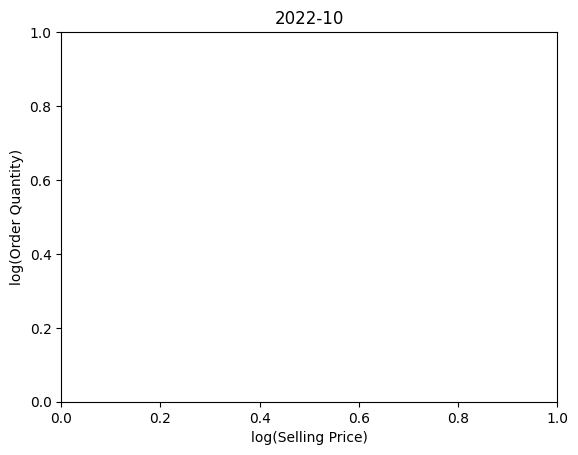

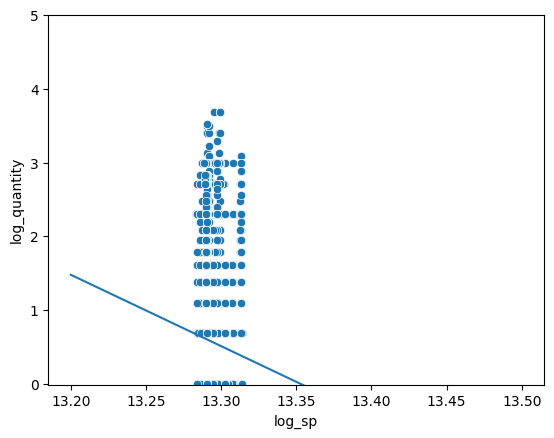

[0.006503949696386235, 0.03715583708879555]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


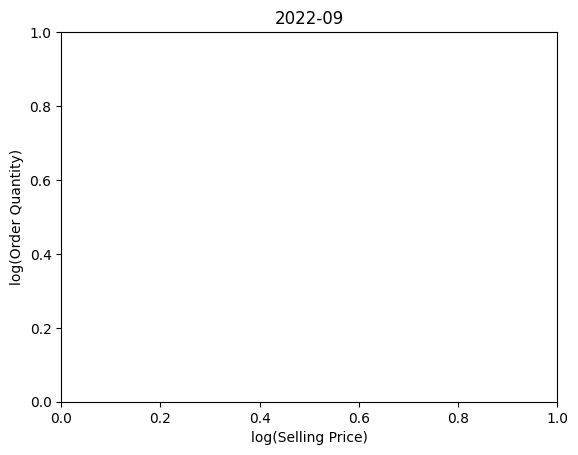

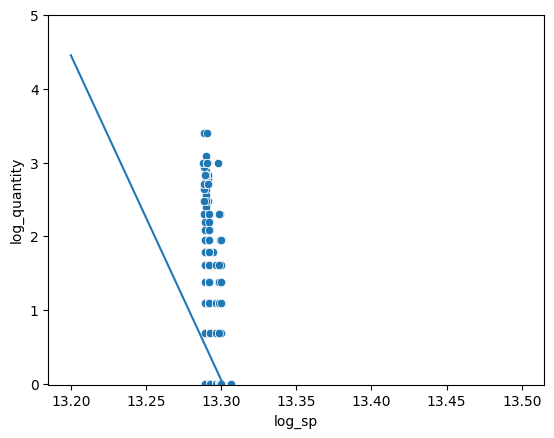

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


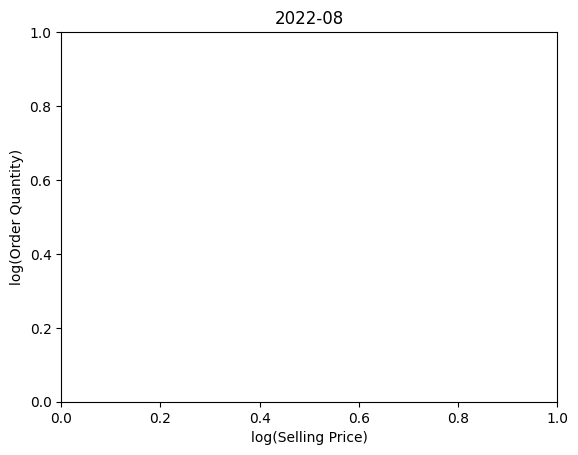

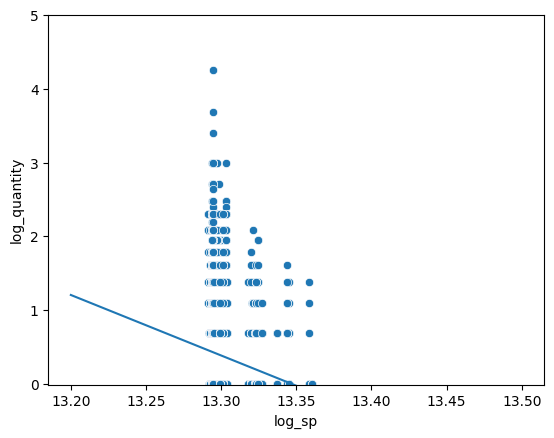

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


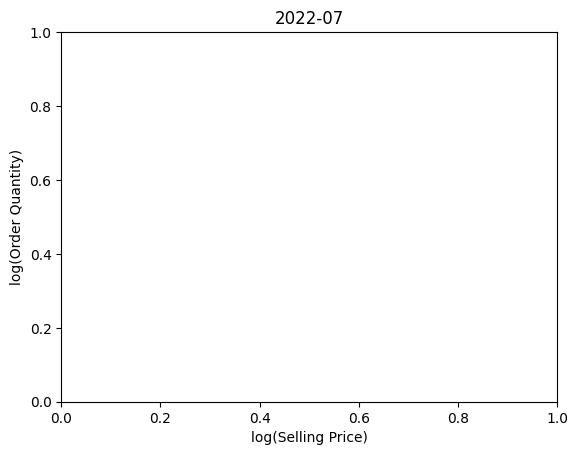

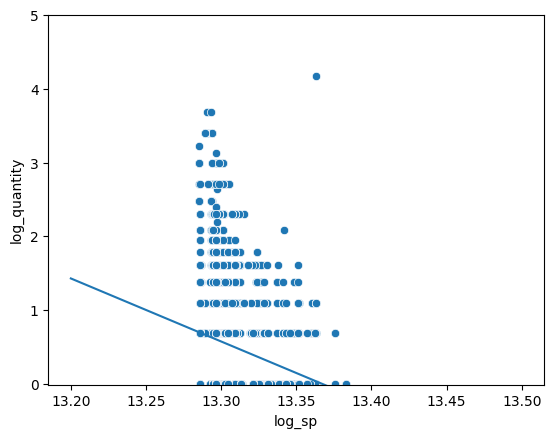

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


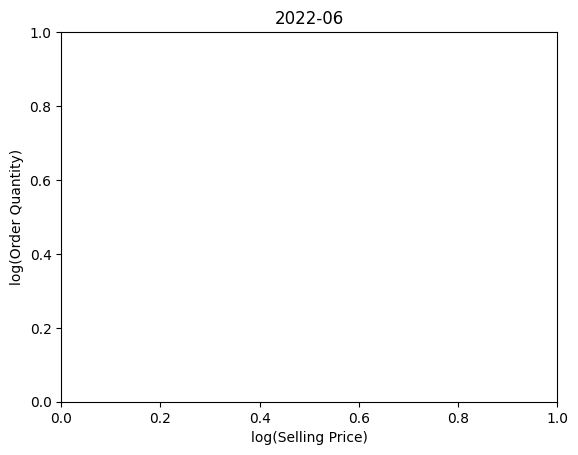

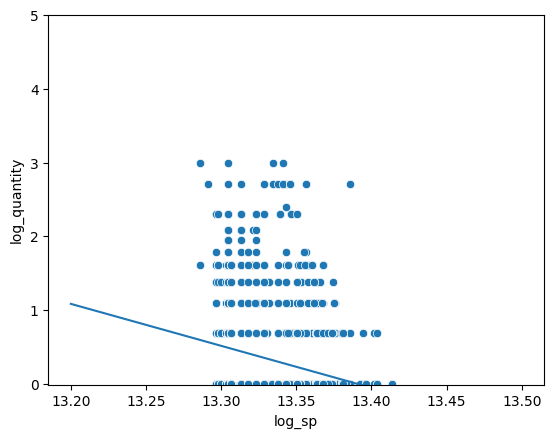

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


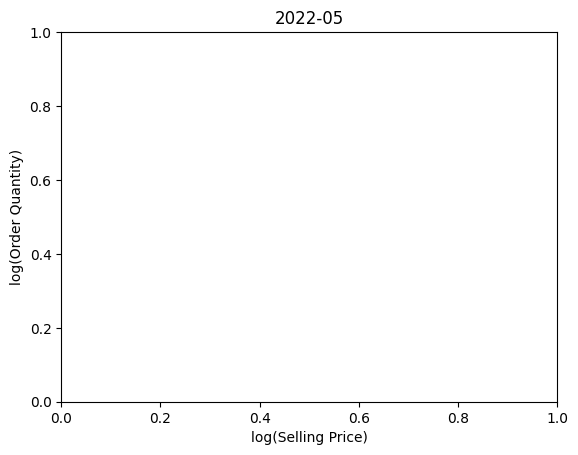

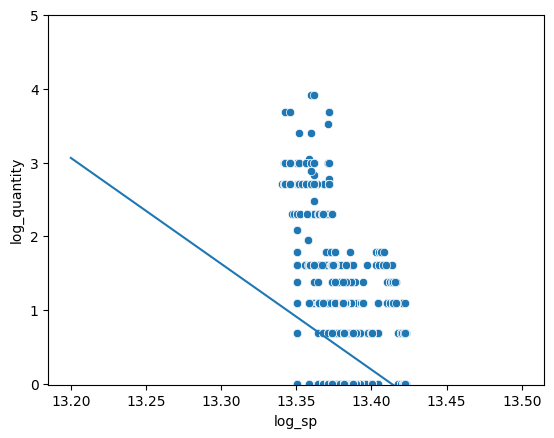

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


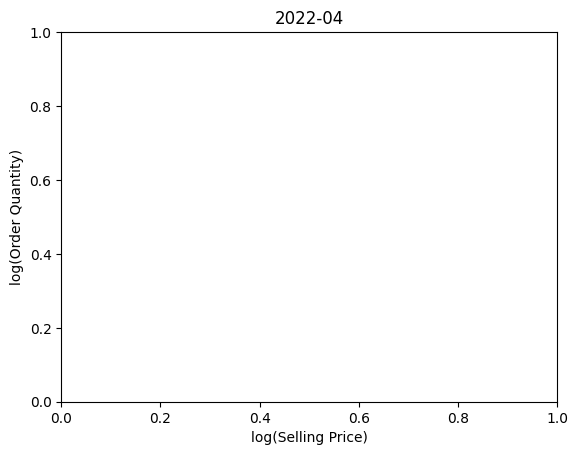

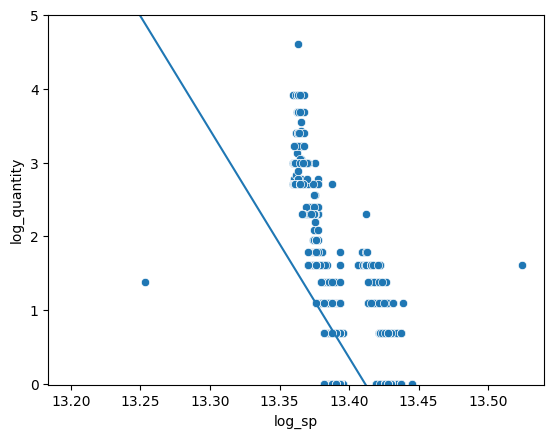

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


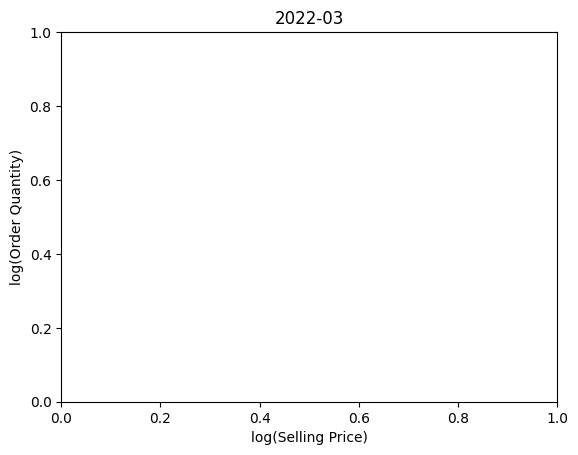

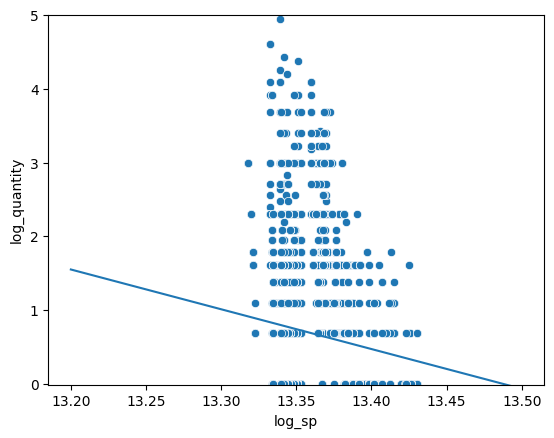

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


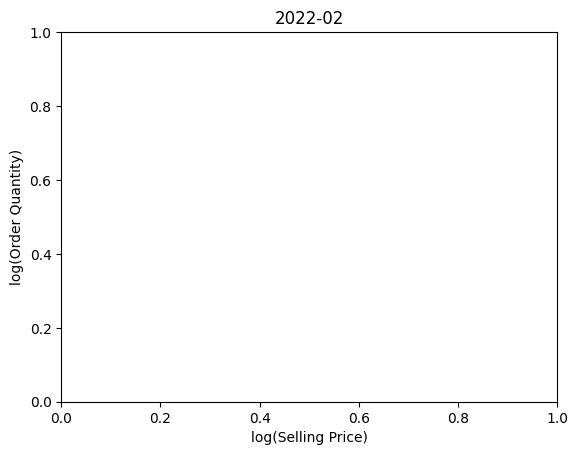

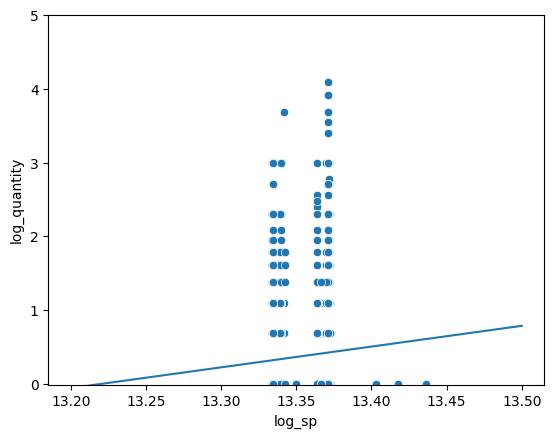

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


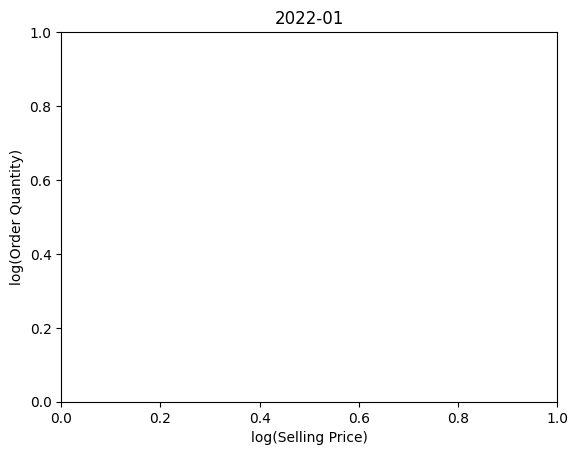

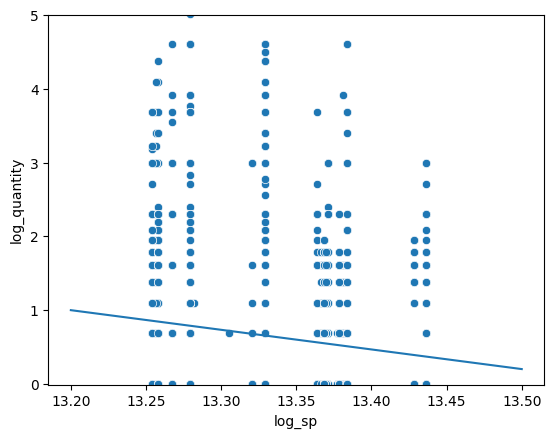

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001, 0.0034900692989939808]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


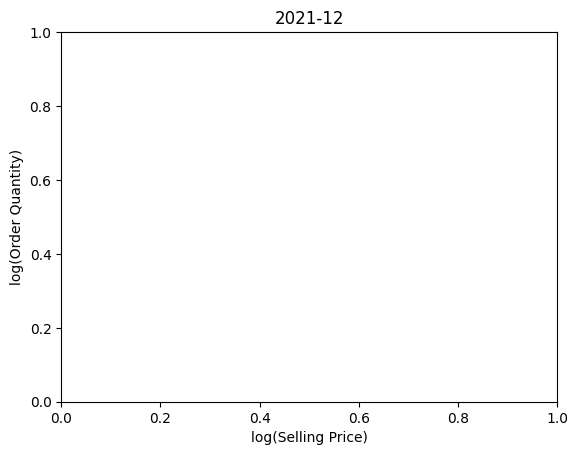

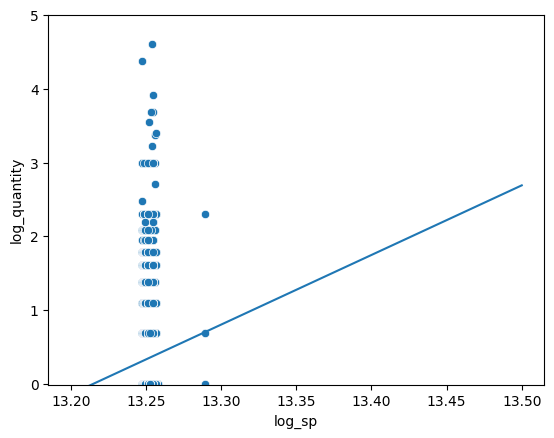

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001, 0.0034900692989939808, 0.026477019924627032]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


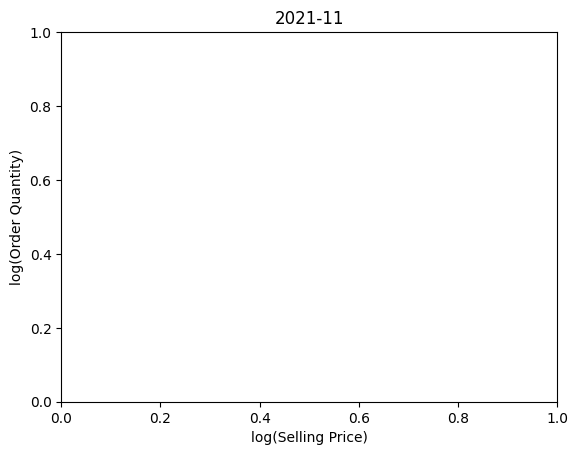

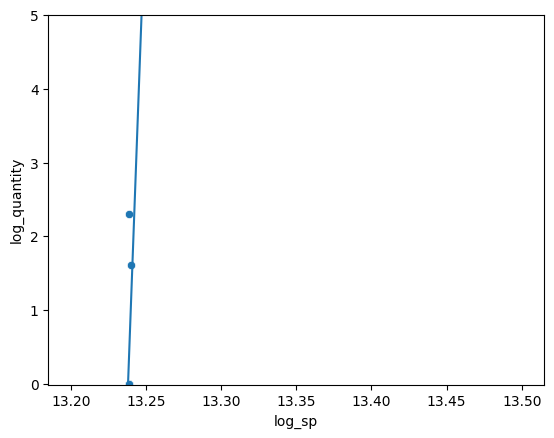

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001, 0.0034900692989939808, 0.026477019924627032, 0.001934337586316004]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


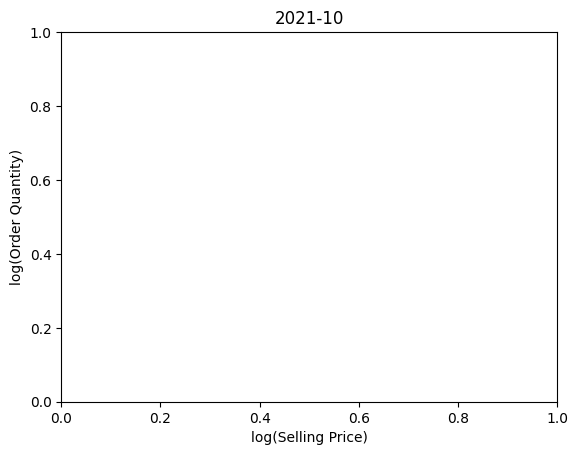

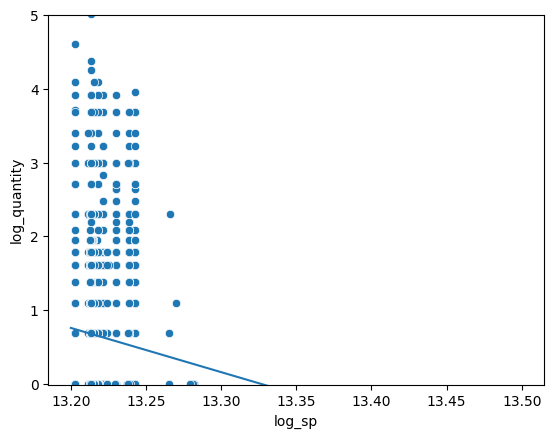

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001, 0.0034900692989939808, 0.026477019924627032, 0.001934337586316004, 0.11648061111264985]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


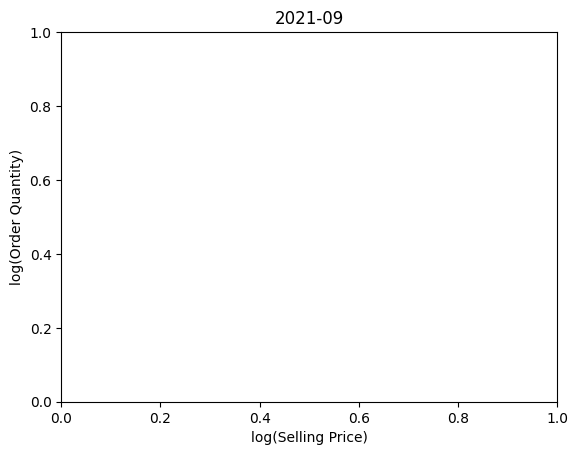

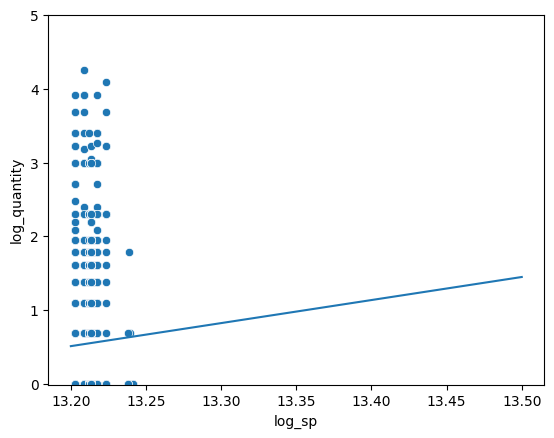

[0.006503949696386235, 0.03715583708879555, 0.010939863295760688, 0.02079845375746514, 0.03306662853610087, 0.07282457748257787, 0.07857679075571244, 0.09737779218841314, 0.3062052104156616, 0.01992446896415001, 0.0034900692989939808, 0.026477019924627032, 0.001934337586316004, 0.11648061111264985, 0.009521831465839958]


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/3587130754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

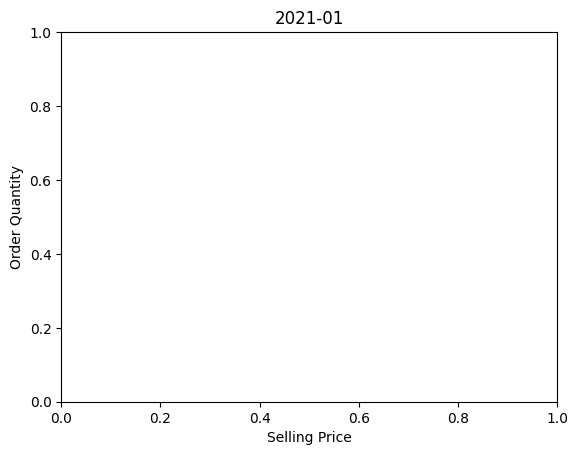

In [9]:
df1 = file_name
slopes = []
intercepts = []
yms = []

# Calculation of R2
r2_library_ = []
r2_calculated_ = []
adj_r2_calculated_ = []

for ym in df1.year_month.unique():
    filtered = df1[df1['year_month'] == ym]
    filtered.dropna(inplace=True)
    
    plt.ylabel('Order Quantity')
    plt.xlabel('Selling Price')
    plt.title('{}'.format(ym))
#     plt.xlim(550000, 765000)
#     plt.ylim(0,100)

#     plt.xticks(rotation=90)
#     sns.scatterplot(y =filtered['order_quantity'], x= filtered['price_sold_at'])
#     plt.title('{}'.format(ym))
#     plt.show() 


    x_ = np.array(filtered['log_sp']).reshape((-1, 1))
    y_ = np.array(filtered['log_quantity']) 

    try: 
        x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)
        model = LinearRegression().fit(x_, y_)
        r2_library = model.score(x_, y_)
        yhat = model.predict(x_)
        SS_Residual = sum((y_-yhat)**2)       
        SS_Total = sum((y_-np.mean(y_))**2)   
        
        
        r2_calculated = 1 - (float(SS_Residual))/SS_Total
        adj_r2_calculated = 1 - (((1-r2_library)*(len(y_)-1))/((len(y_)-x_.shape[1]-1)))
        
        slope = model.coef_[0]
        intercept = model.intercept_

        
        # Plotting Part

        plt.ylabel('log(Order Quantity)')
        plt.xlabel('log(Selling Price)')
        plt.title('{}'.format(ym))

        # plt.xticks(rotation=90)
        x_plot= np.array([13.2,13.3, 13.4, 13.5])
        y_plot= slope*x_plot + intercept
        
        plt.show()

        sns.lineplot(y = y_plot, x= x_plot) 
        sns.scatterplot(y = filtered['log_quantity'], x= filtered['log_sp'])
        plt.ylim(-0.01,5)
        plt.show()

        # print the lists together 
        yms.append(ym)
        slopes.append(slope)
        intercepts.append(intercept)
        #equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))
        #print(equations)
        print(r2_library_)
        r2_library_.append(r2_library)
        r2_calculated_.append(r2_calculated)
        adj_r2_calculated_.append(adj_r2_calculated)
        

    except Exception as e: 
        continue            

In [10]:
df1.columns

Index(['order_time_jkt', 'usin', 'order_id', 'bp', 'order_month', 'order_year',
       'price_sold_at', 'order_quantity', 'city', 'province', 'year', 'month',
       'year_month', 'day', 'week', 'weekday', 'log_quantity', 'log_sp'],
      dtype='object')

### Before Aggregation

In [11]:
pd.DataFrame({'Year_Month': yms,
             'Price Elasticity': slopes, 
             'Intercept': intercepts,
            'Library Gen R2': r2_library_,  
             'Calculated R2': r2_calculated_,
             'Adjusted R2': adj_r2_calculated_})

,Year_Month,Price Elasticity,Intercept,Library Gen R2,Calculated R2,Adjusted R2
0,2022-12,-13.8043,184.1091,0.0065,0.0065,0.0063
1,2022-11,-62.6931,835.0536,0.0372,0.0372,0.0370
2,2022-10,-9.6728,129.1593,0.0109,0.0109,0.0109
3,2022-09,-44.0058,585.3303,0.0208,0.0208,0.0207
4,2022-08,-8.2021,109.4729,0.0331,0.0331,0.0330
5,2022-07,-8.5448,114.2206,0.0728,0.0728,0.0727
6,2022-06,-5.6872,76.1549,0.0786,0.0786,0.0784
7,2022-05,-14.3510,192.4957,0.0974,0.0974,0.0972
8,2022-04,-30.8645,413.9397,0.3062,0.3062,0.3061
9,2022-03,-5.3921,72.7258,0.0199,0.0199,0.0198


In [12]:
r2_library

0.00048338071449971487

### After Aggregation

Average Aggregation: 1 quantity per price point

We need to answer what is the quantity sold at each of the price points. Getting 1 quantity point for each of the price point.

In [13]:
df1 = file_name.groupby(by=['year_month', 'price_sold_at'], as_index=False).mean()
df1 = df1[['year_month','price_sold_at', 'order_quantity']]

df1['log_quantity'] = df1['order_quantity'].apply(lambda x: math.log(x))
df1['log_sp'] = df1['price_sold_at'].apply(lambda x: math.log(x))

### MoM scatterplots - V1 / scatter & log-log graphs + Q-Q Plot

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)
/Users/bhumikalamba/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:44: RuntimeWarning: invalid value encountered in double_scalars
  r2_calculated = 1 - (float(SS_Residual))/SS_Total


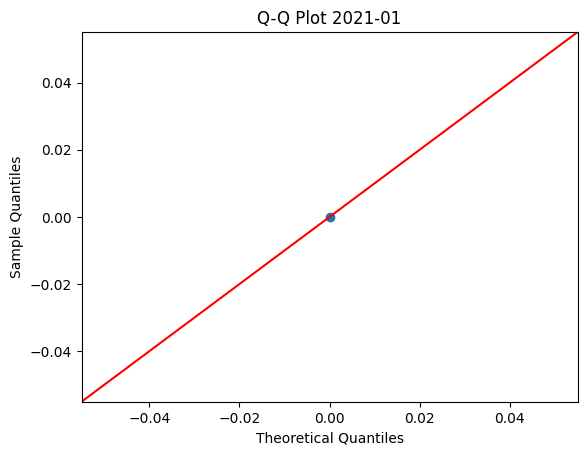

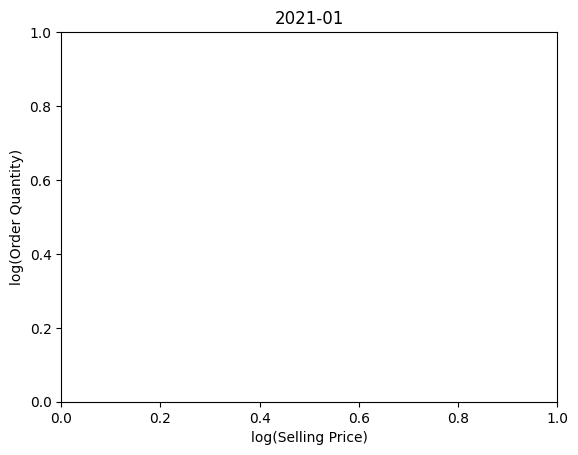

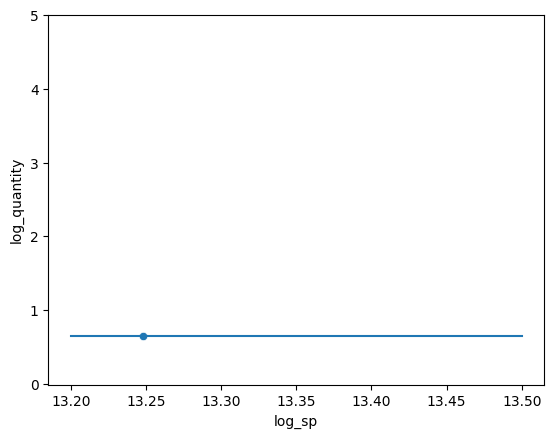

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)
/Users/bhumikalamba/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:44: RuntimeWarning: invalid value encountered in double_scalars
  r2_calculated = 1 - (float(SS_Residual))/SS_Total


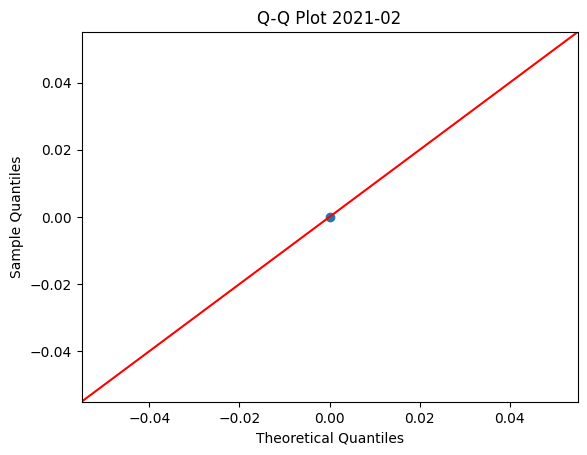

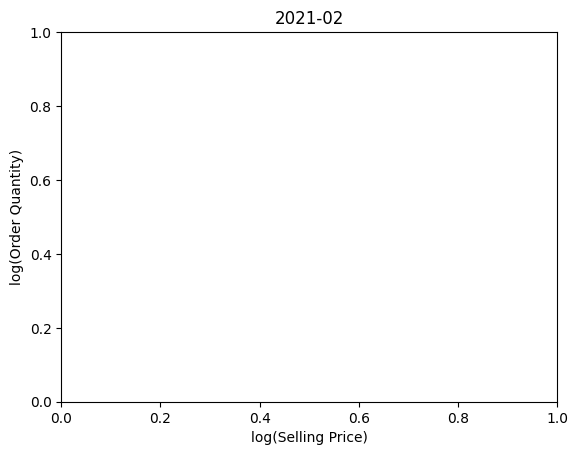

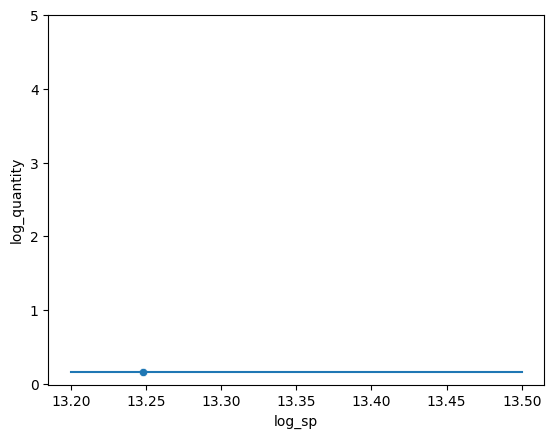

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


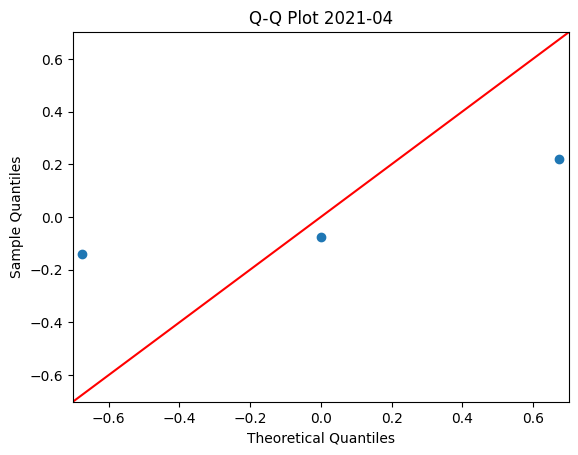

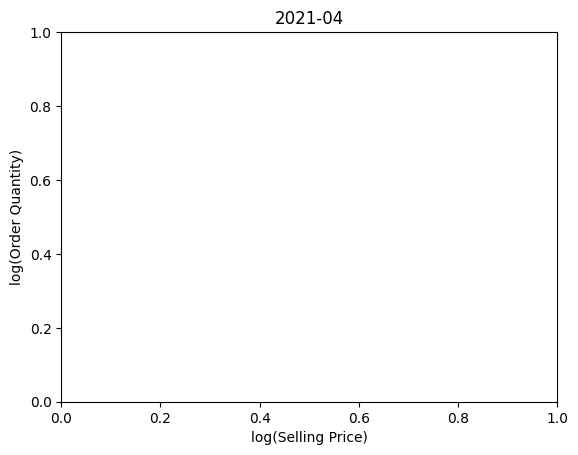

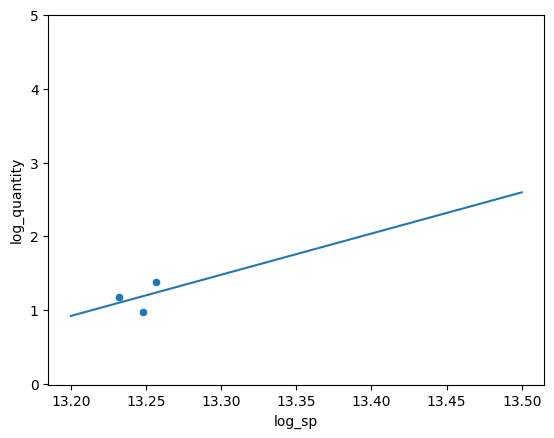

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


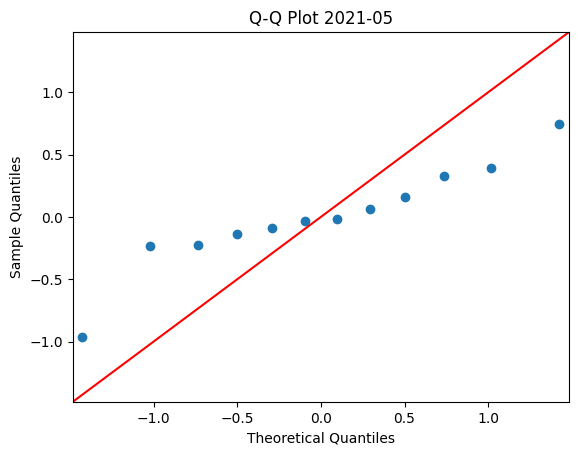

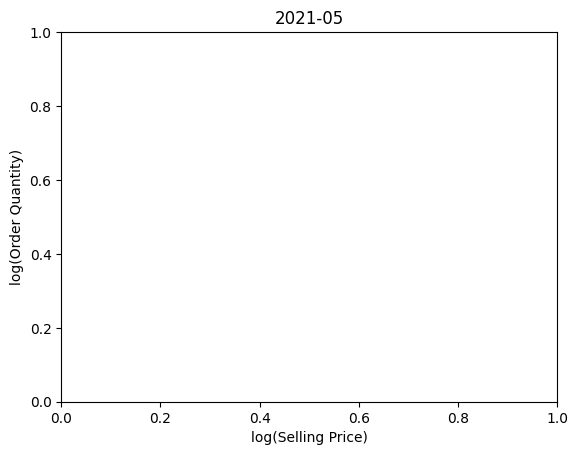

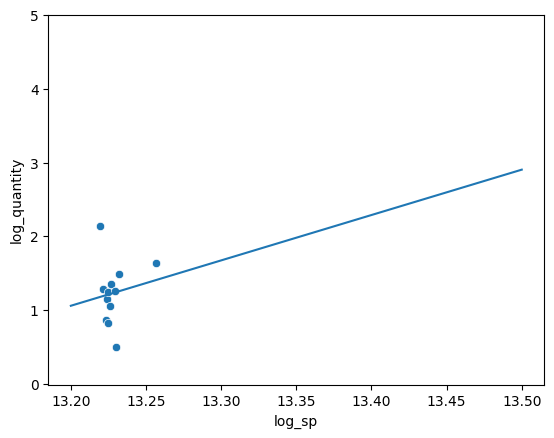

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


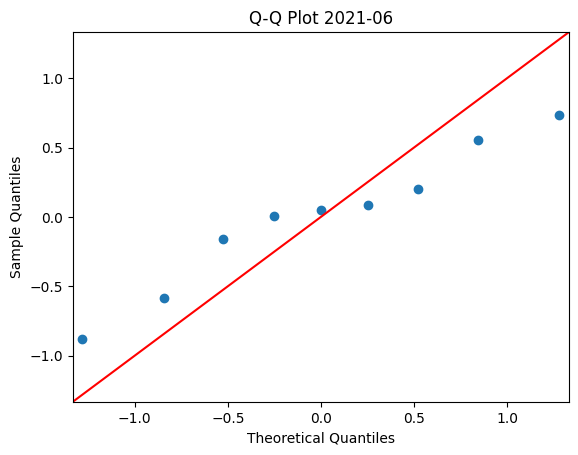

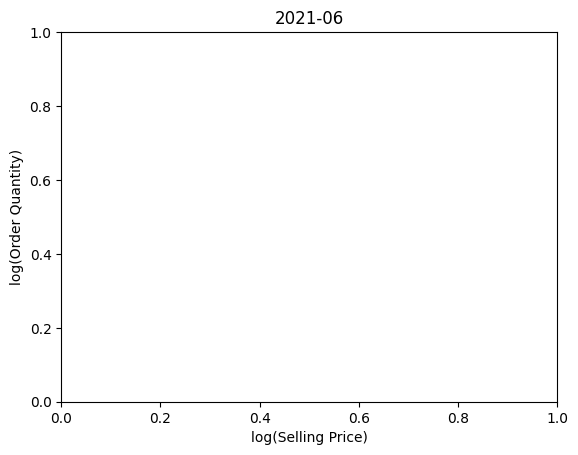

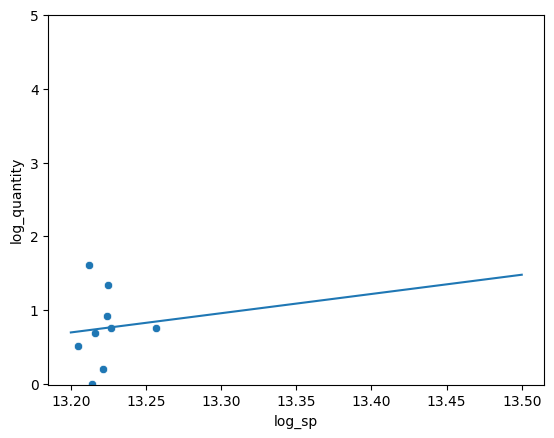

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


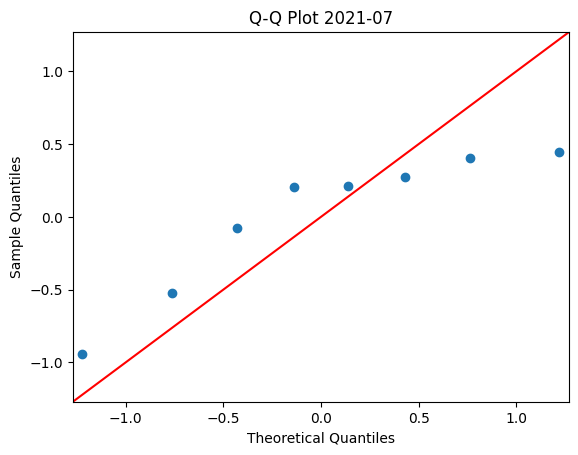

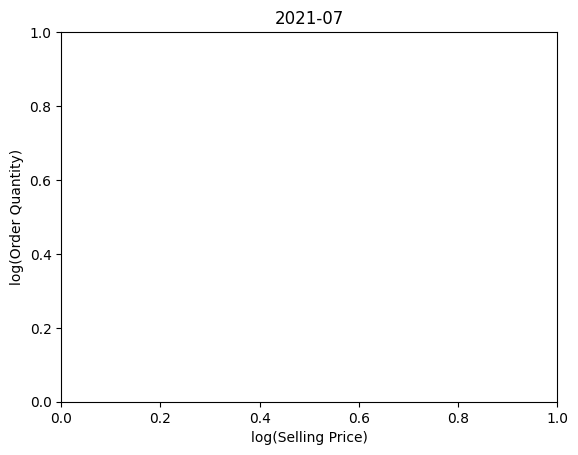

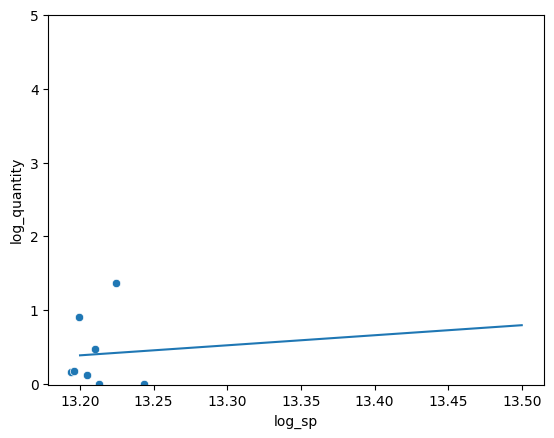

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


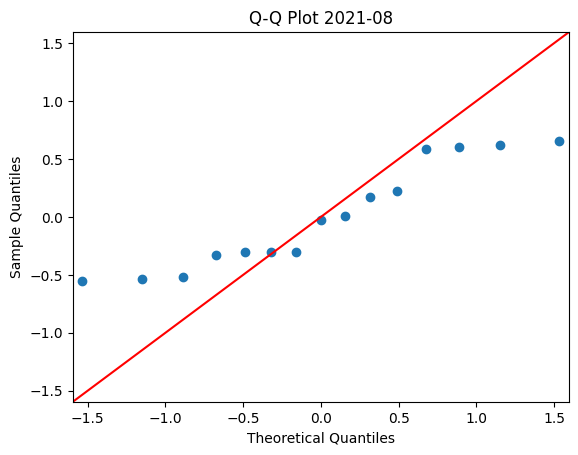

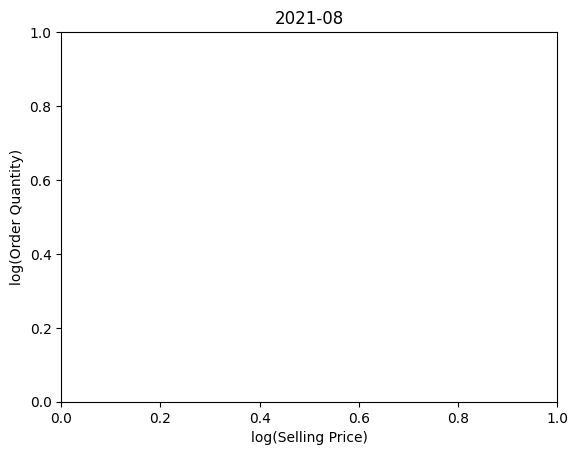

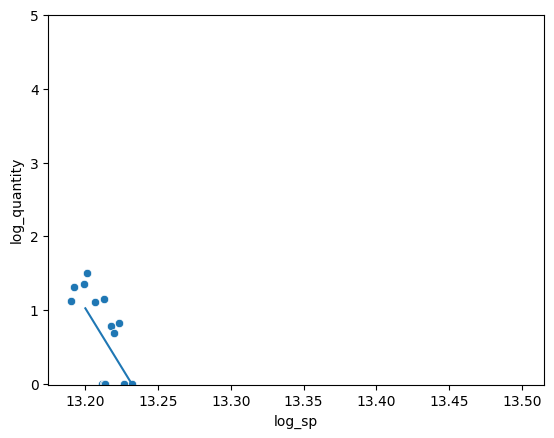

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


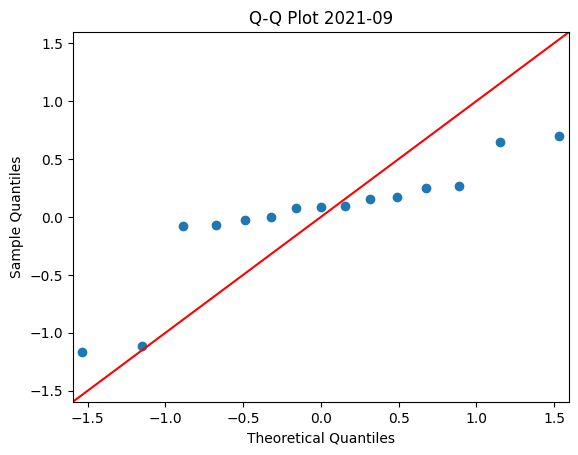

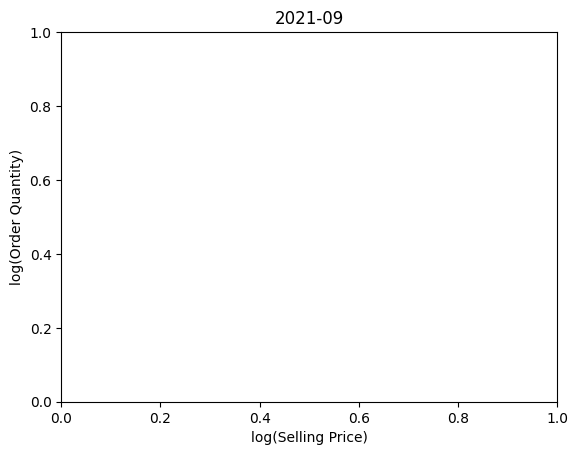

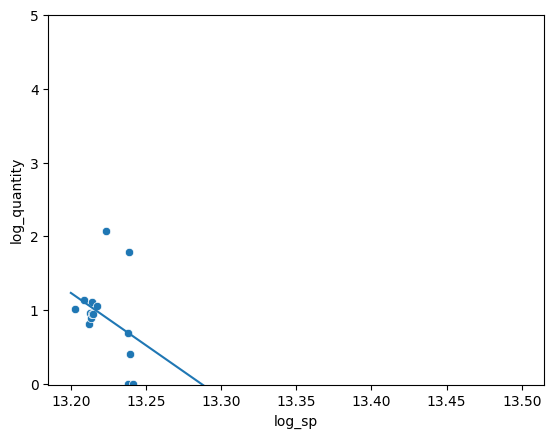

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


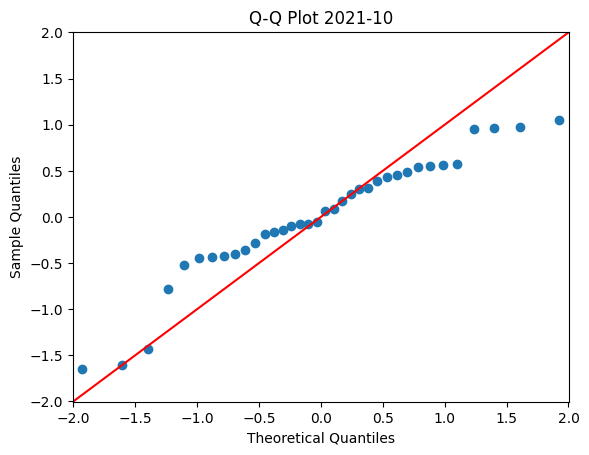

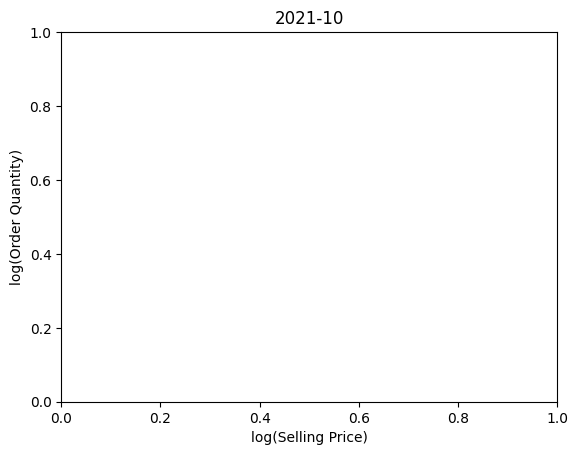

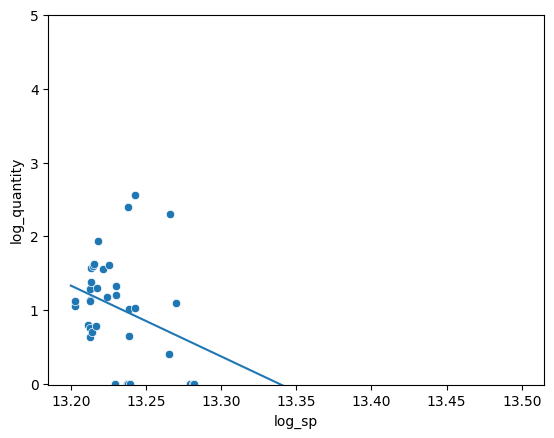

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


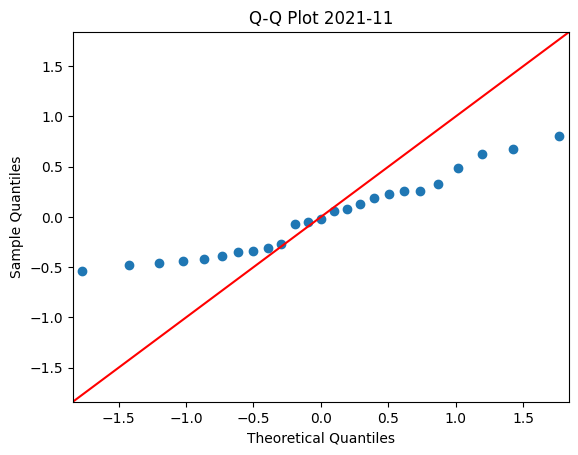

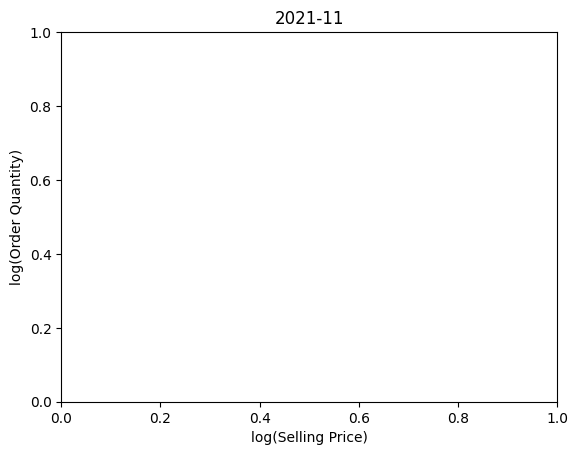

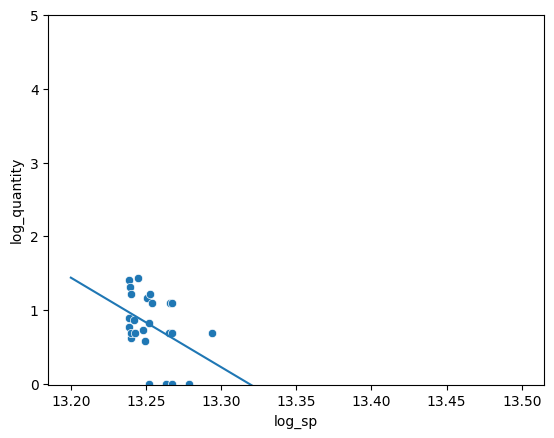

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


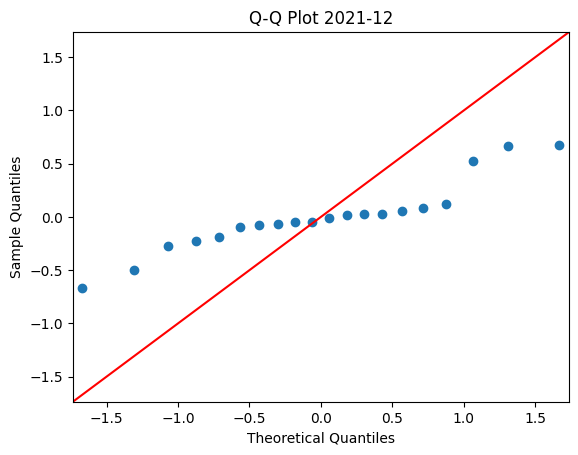

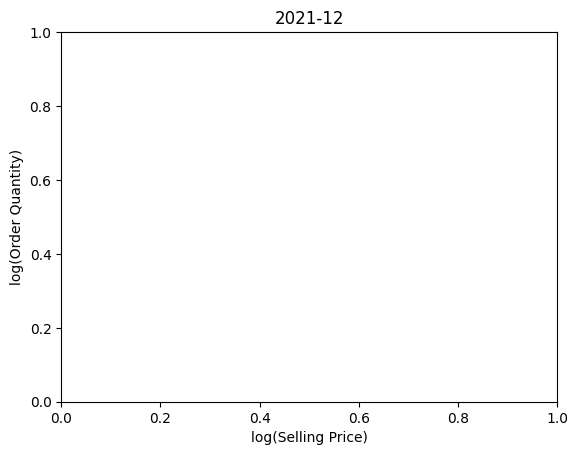

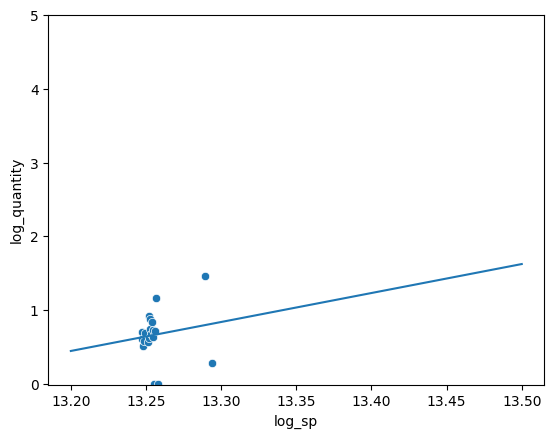

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


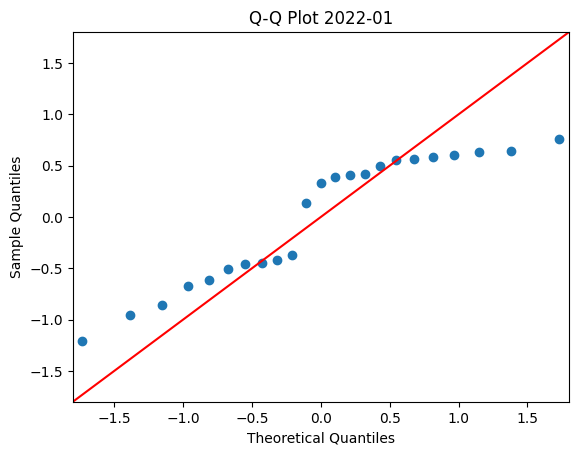

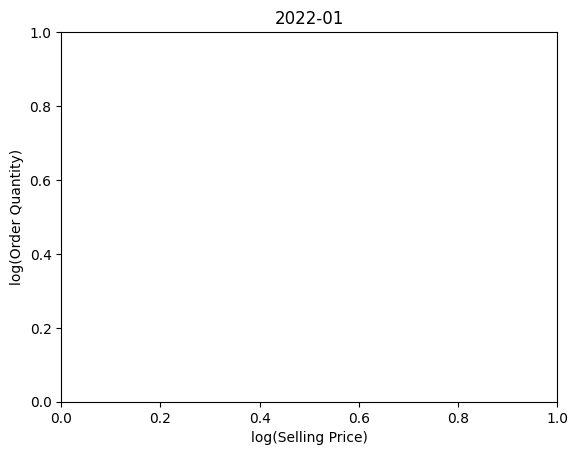

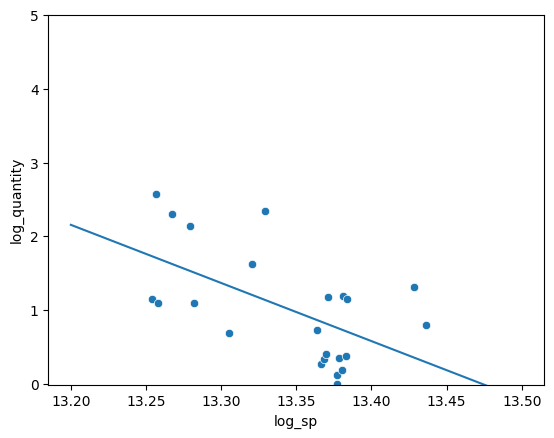

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


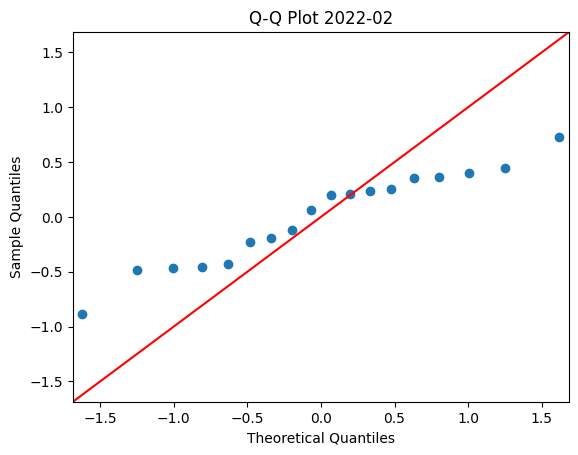

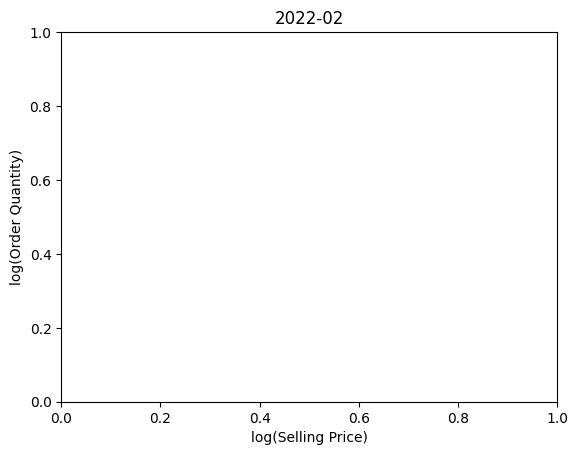

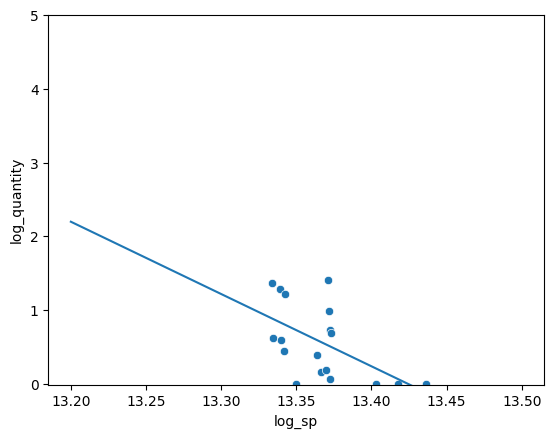

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


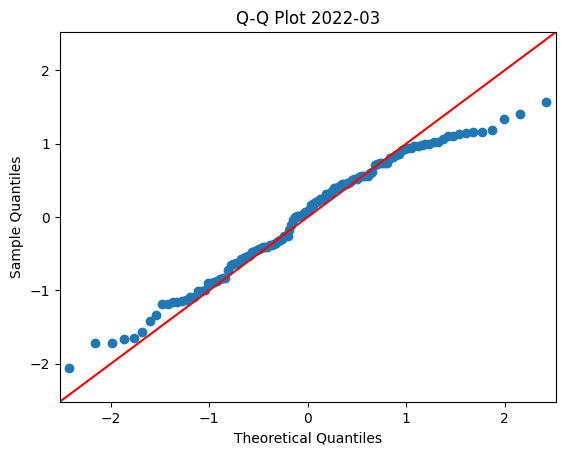

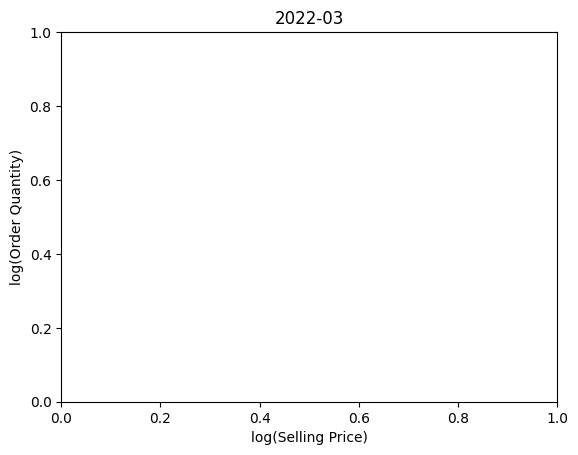

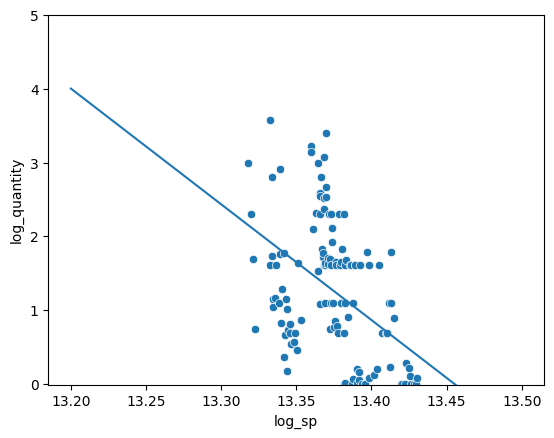

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


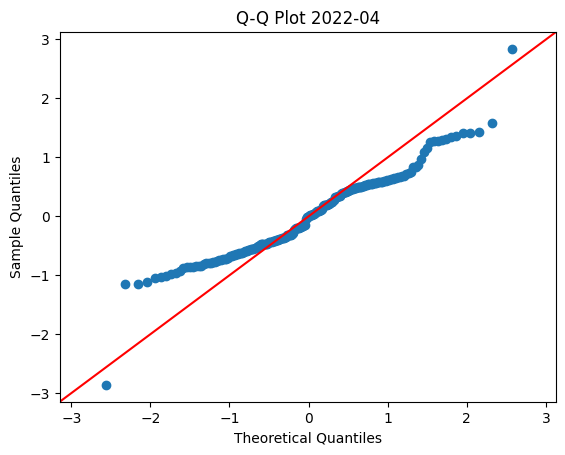

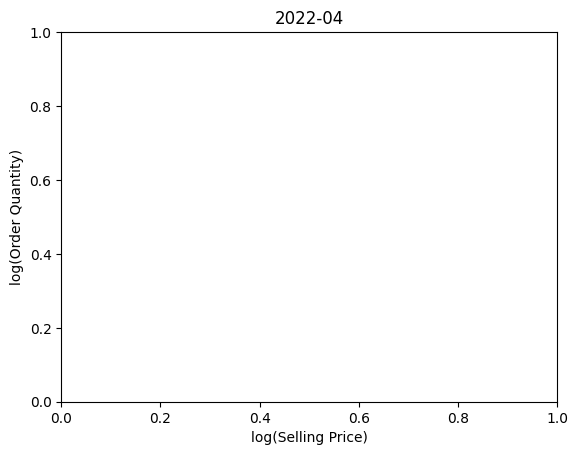

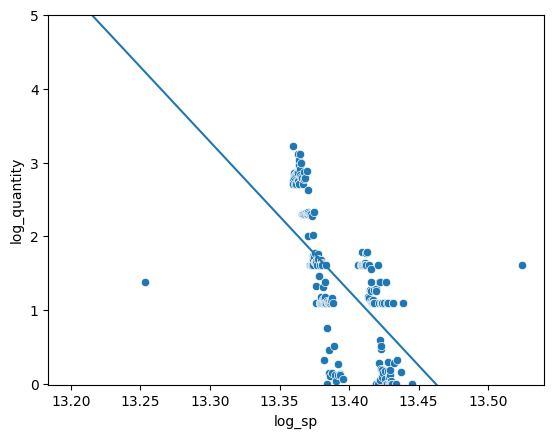

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


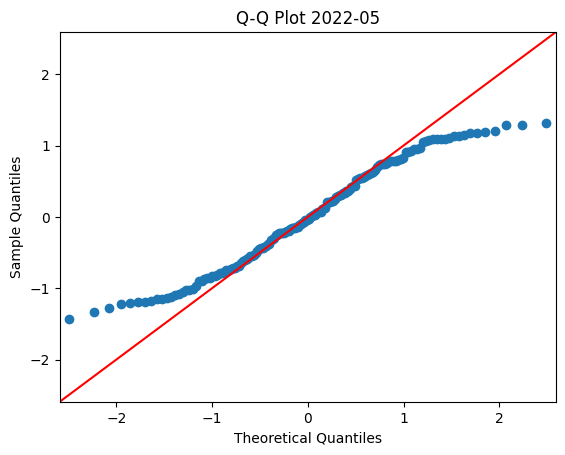

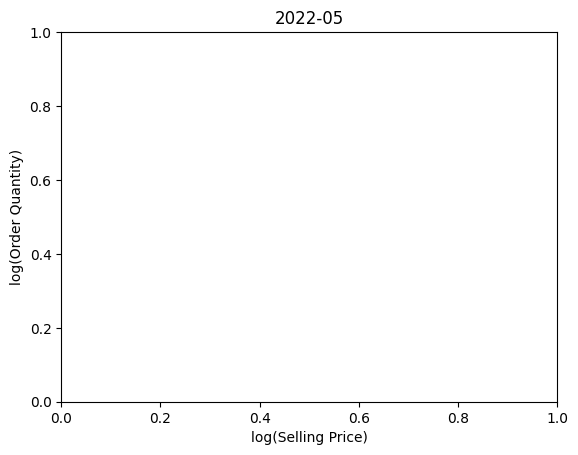

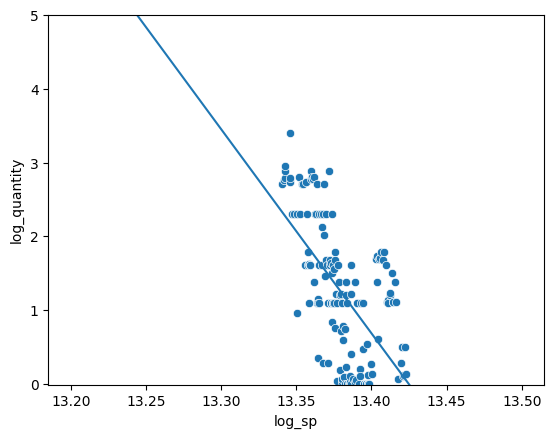

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


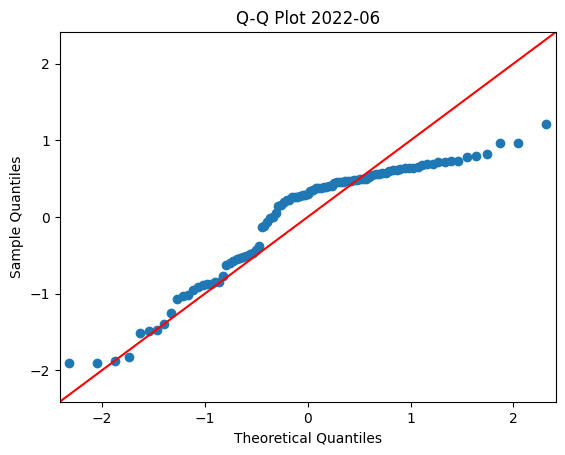

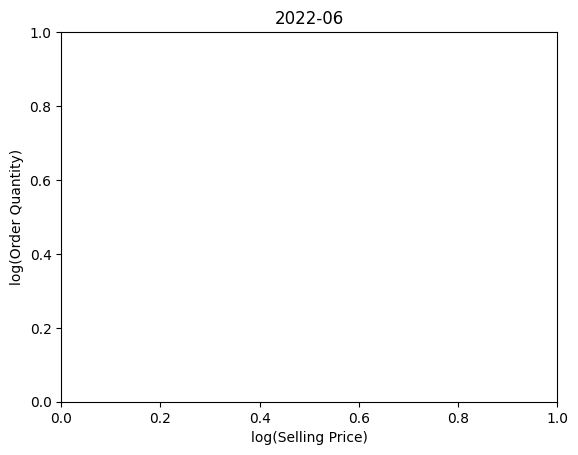

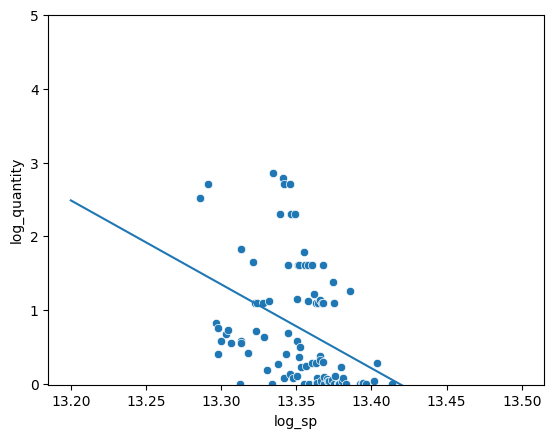

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


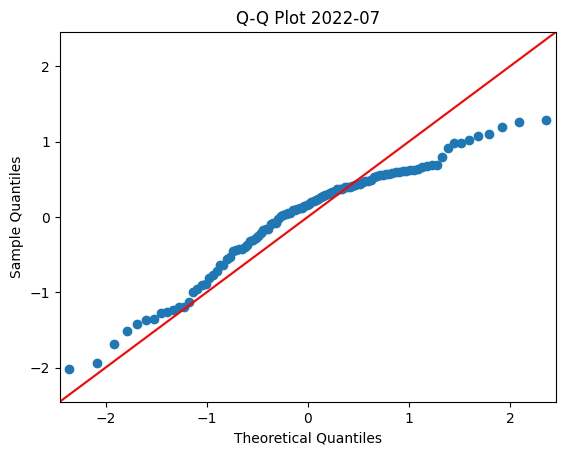

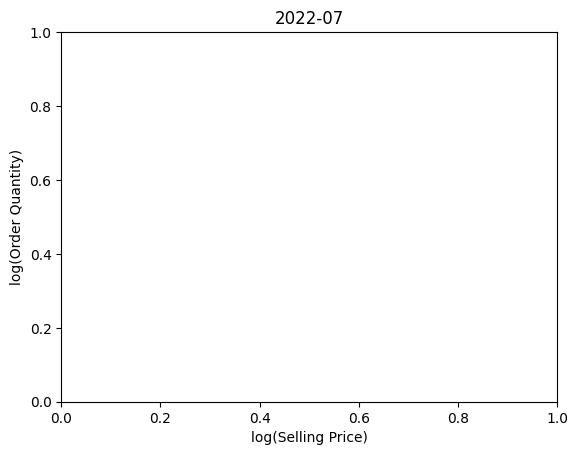

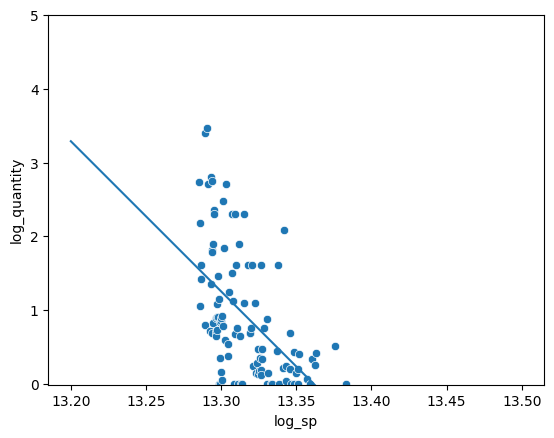

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


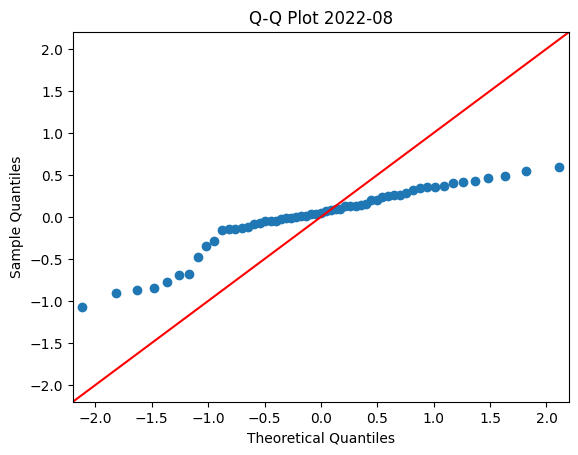

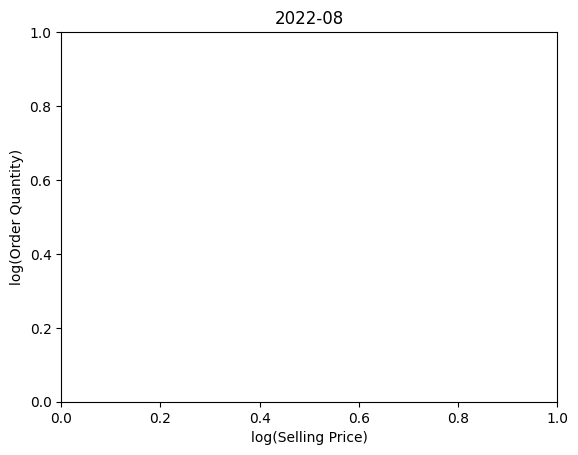

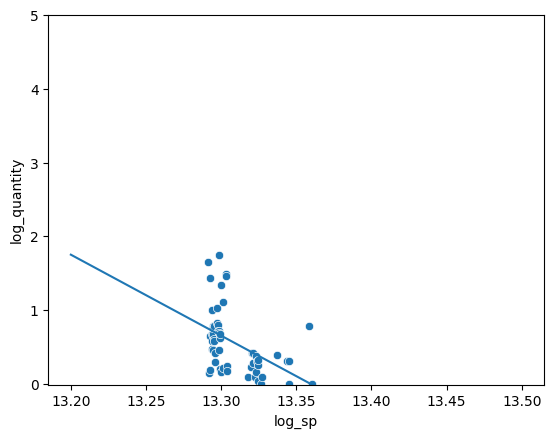

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


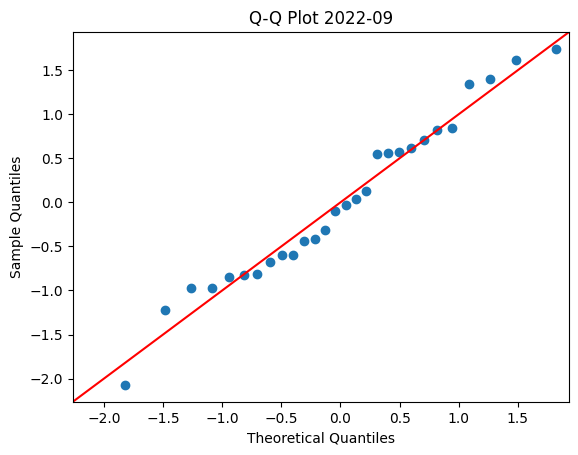

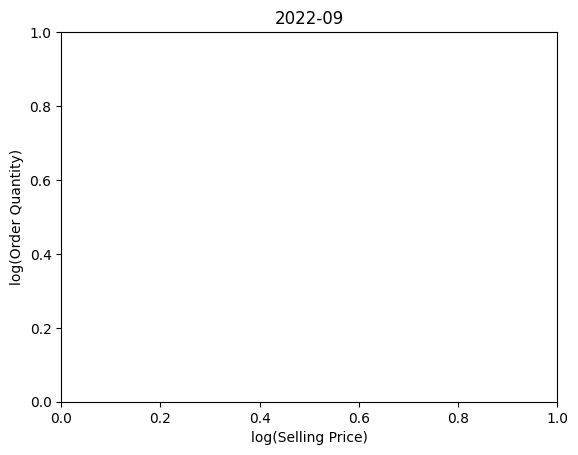

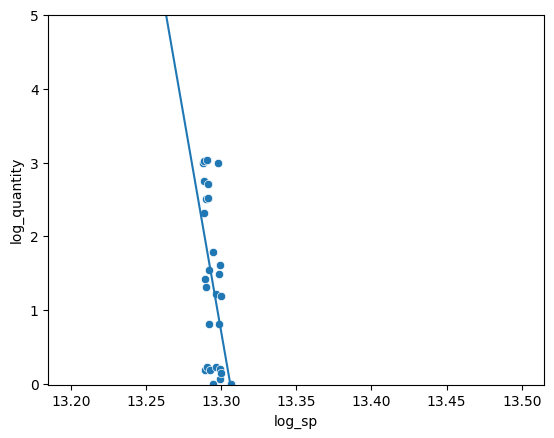

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


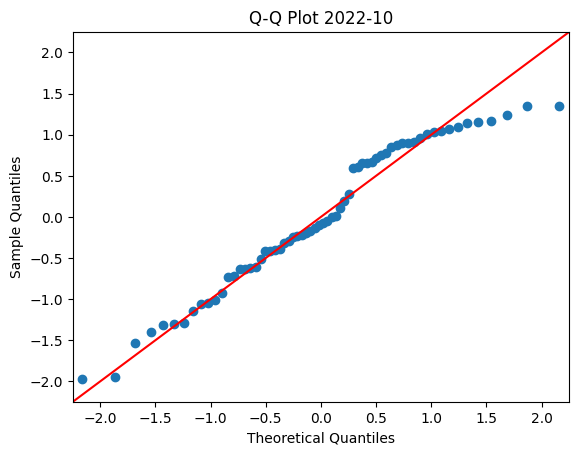

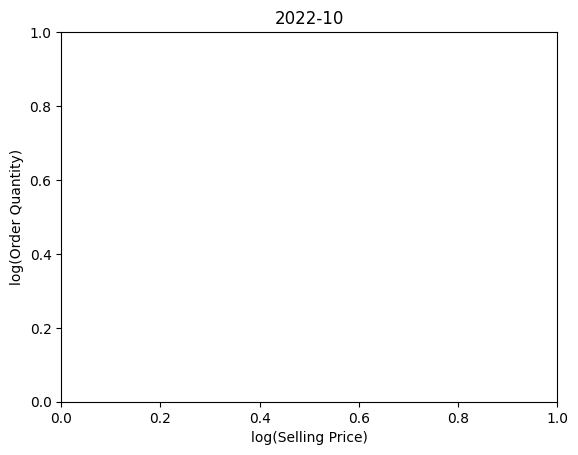

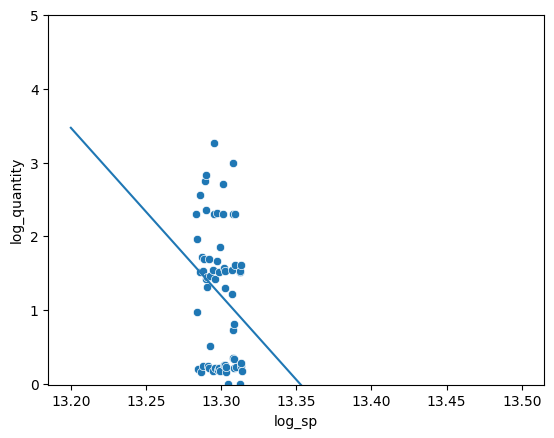

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


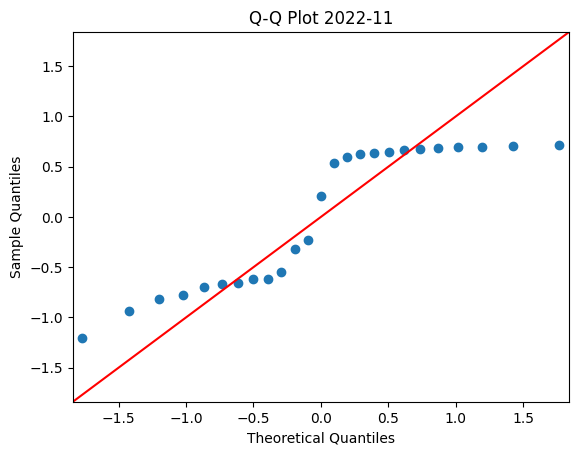

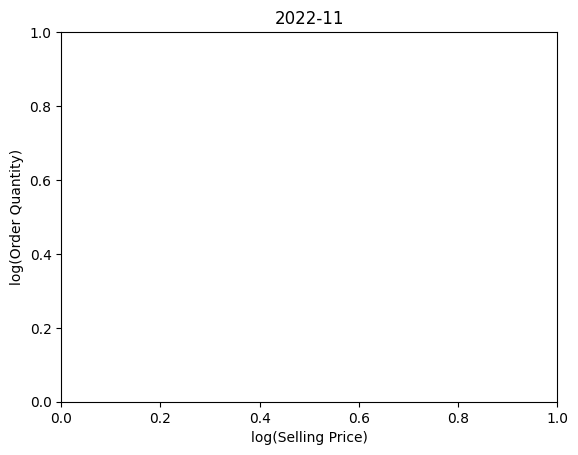

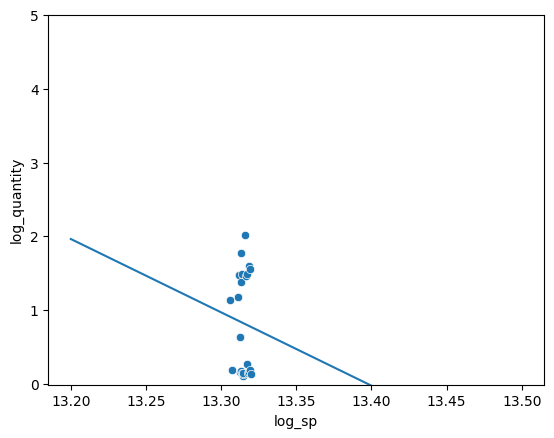

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_2628/365107698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.dropna(inplace=True)


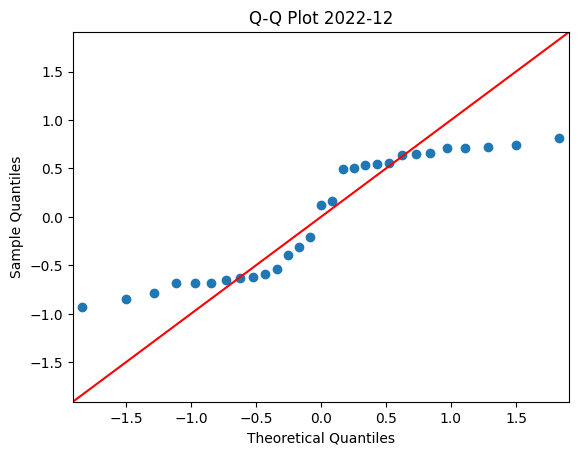

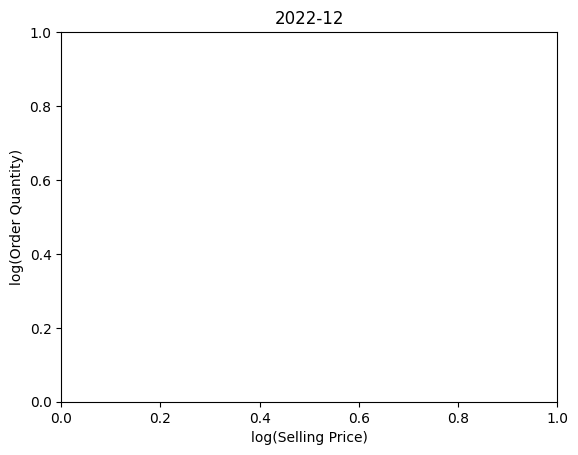

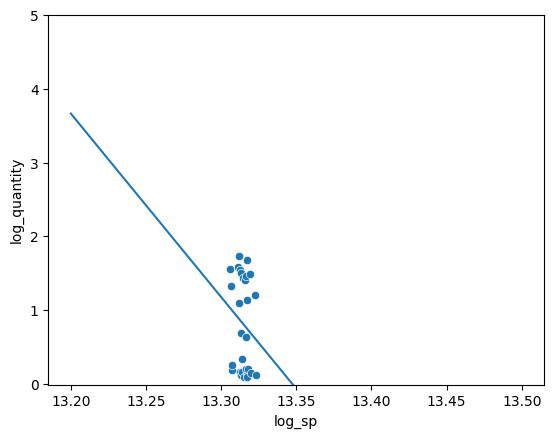

In [14]:
slopes = []
intercepts = []
yms = []

# Calculation of R2
r2_library_ = []
r2_calculated_ = []
adj_r2_calculated_ = []
datapoint_count = []

shapiro_stats = []
shapiro_pvalue = []
model_pvalue = []

for ym in df1.year_month.unique():
    filtered = df1[df1['year_month'] == ym]
    filtered.dropna(inplace=True)
#     plt.ylabel('Order Quantity')
#     plt.xlabel('Selling Price')
#     plt.title('{}'.format(ym))
#     plt.xlim(550000, 765000)
#     plt.ylim(0,100)

#     plt.xticks(rotation=90)
#     sns.scatterplot(y =filtered['order_quantity'], x= filtered['price_sold_at'])
#     plt.title('{}'.format(ym))
#     plt.show()

    x_ = np.array(filtered['log_sp']).reshape((-1, 1))
    y_ = np.array(filtered['log_quantity']) 

    try: 
        x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)
        
        model = LinearRegression().fit(x_, y_)
        r2_library = model.score(x_, y_)


        yhat = model.predict(x_)
        SS_Residual = sum((y_-yhat)**2)       
        SS_Total = sum((y_-np.mean(y_))**2)   
        
        
        r2_calculated = 1 - (float(SS_Residual))/SS_Total
        adj_r2_calculated = 1 - (((1-r2_library)*(len(y_)-1))/((len(y_)-x_.shape[1]-1)))
        
                
        slope = model.coef_[0]
        intercept = model.intercept_

        datapoint_count.append(len(x_))

         # Q-Q Plot
        y_pred = model.predict(x_)
        residuals = y_pred - y_
        sm.qqplot(residuals, line='45')
        plt.title('Q-Q Plot {}'.format(ym))
        plt.show()
        
        # Plotting Part

        plt.ylabel('log(Order Quantity)')
        plt.xlabel('log(Selling Price)')
        plt.title('{}'.format(ym))

        # plt.xticks(rotation=90)
        x_plot= np.array([13.2,13.3, 13.4, 13.5])
        y_plot= slope*x_plot + intercept
        
        plt.show()

        sns.lineplot(y = y_plot, x= x_plot) 
        sns.scatterplot(y = filtered['log_quantity'], x= filtered['log_sp'])
        plt.ylim(-0.01,5)
        plt.show()

        # print the lists together 
        yms.append(ym)
        slopes.append(slope)
        intercepts.append(intercept)
        # equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))
                
        r2_library_.append(r2_library)
        r2_calculated_.append(r2_calculated)
        adj_r2_calculated_.append(adj_r2_calculated)
        shapiro_stats.append(shapiro(residuals).statistic)
        shapiro_pvalue.append(shapiro(residuals).pvalue)
        

    except Exception as e: 
        continue            

### After Aggregation
Reason for -ve Adjusted R2: When R2 is low and no: of price points are less (5-20), 1-R2 is high, and the denominator is low, such that 1- (fraction > 1) gives a -ve number. 

In [15]:
len(r2_library_)

23

In [16]:
pd.DataFrame({'Year_Month': yms,
             'Price Elasticity': slopes, 
             'Intercept': intercepts,
            'Library Gen R2': r2_library_,  
             'Calculated R2': r2_calculated_,
             'Adjusted R2': adj_r2_calculated_,
             'Datapoint Count': datapoint_count})

,Year_Month,Price Elasticity,Intercept,Library Gen R2,Calculated R2,Adjusted R2,Datapoint Count
0,2021-01,0.0000,0.6523,NaN,NaN,NaN,1
1,2021-02,0.0000,0.1643,NaN,NaN,NaN,1
2,2021-04,5.5844,-72.7940,0.1163,0.1163,-0.7673,3
3,2021-05,6.1500,-80.1213,0.0200,0.0200,-0.0780,12
4,2021-06,2.6077,-33.7244,0.0058,0.0058,-0.1363,9
5,2021-07,1.3616,-17.5870,0.0021,0.0021,-0.1642,8
6,2021-08,-32.1135,424.9222,0.4212,0.4212,0.3766,15
7,2021-09,-14.2040,188.7252,0.1181,0.1181,0.0502,15
8,2021-10,-9.6027,128.0873,0.0957,0.0957,0.0691,36
9,2021-11,-12.1292,161.5453,0.1637,0.1637,0.1274,25


### Hypothesis: Check if 3 months clubbed together gives a better R2 than the averaged R2 of the three months July, August, September

    year_month  price_sold_at  order_quantity  log_quantity  log_sp  month  \
760    2022-07    588500.0000         15.5000        2.7408 13.2853      7   
761    2022-07    588800.0000          8.8571        2.1812 13.2858      7   
762    2022-07    589000.0000          2.8667        1.0531 13.2862      7   
763    2022-07    589100.0000          4.1429        1.4214 13.2864      7   
764    2022-07    589200.0000          5.0000        1.6094 13.2865      7   
..         ...            ...             ...           ...     ...    ...   
948    2022-09    596800.0000          5.0000        1.6094 13.2993      9   
949    2022-09    596900.0000          1.0625        0.0606 13.2995      9   
950    2022-09    597000.0000          3.2881        1.1903 13.2997      9   
951    2022-09    597200.0000          1.1532        0.1426 13.3000      9   
952    2022-09    601000.0000          1.0000        0.0000 13.3064      9   

     year  
760  2022  
761  2022  
762  2022  
763  2022  
764

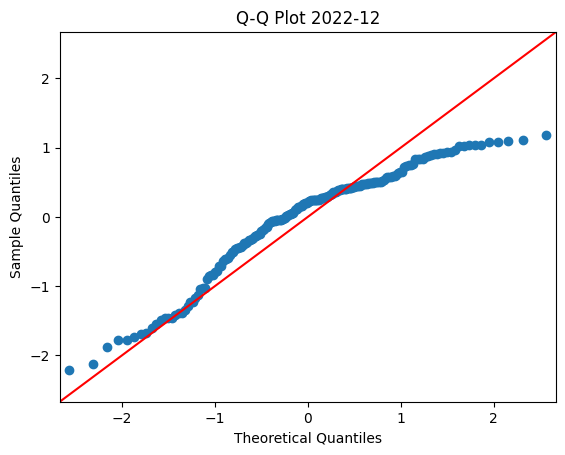

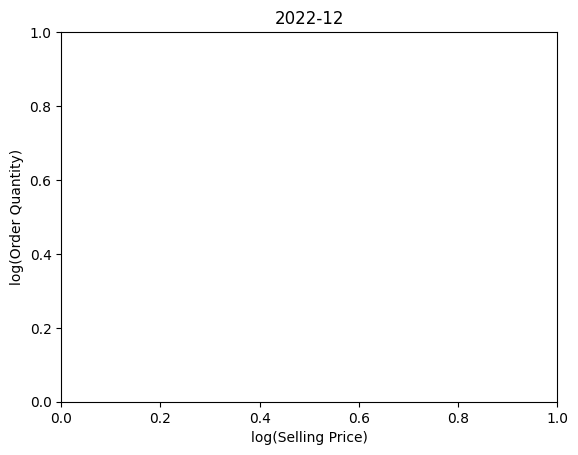

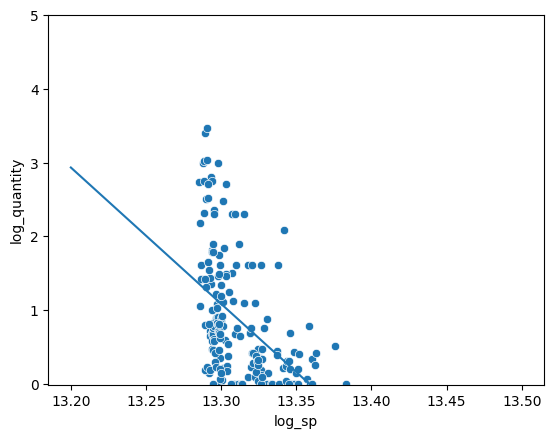

0


In [17]:
slopes = []
intercepts = []

# Calculation of R2
r2_library_ = []
r2_calculated_ = []
adj_r2_calculated_ = []
datapoint_count = []

shapiro_stats = []
shapiro_pvalue = []
model_pvalue = []

df1['month'] = df1['year_month'].dt.month
df1['year'] = df1['year_month'].dt.year


df1 = df1[(df1['year'] == 2022)]
filtered = df1[((df1['month'] == 7) | (df1['month'] == 8)| (df1['month'] == 9))]
print(filtered)

#     plt.ylabel('Order Quantity')
#     plt.xlabel('Selling Price')
#     plt.title('{}'.format(ym))
#     plt.xlim(550000, 765000)
#     plt.ylim(0,100)

#     plt.xticks(rotation=90)
#     sns.scatterplot(y =filtered['order_quantity'], x= filtered['price_sold_at'])
#     plt.title('{}'.format(ym))
#     plt.show()

x_ = np.array(filtered['log_sp']).reshape((-1, 1))
y_ = np.array(filtered['log_quantity']) 

try: 
    x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)

    model = LinearRegression().fit(x_, y_)
    r2_library = model.score(x_, y_)


    yhat = model.predict(x_)
    SS_Residual = sum((y_-yhat)**2)       
    SS_Total = sum((y_-np.mean(y_))**2)   


    r2_calculated = 1 - (float(SS_Residual))/SS_Total
    adj_r2_calculated = 1 - (((1-r2_library)*(len(y_)-1))/((len(y_)-x_.shape[1]-1)))


    slope = model.coef_[0]
    intercept = model.intercept_

    r2_library_.append(r2_library)
    r2_calculated_.append(r2_calculated)
    adj_r2_calculated_.append(adj_r2_calculated)

    datapoint_count.append(len(x_))

     # Q-Q Plot
    y_pred = model.predict(x_)
    residuals = y_pred - y_
    sm.qqplot(residuals, line='45')
    shapiro_stats.append(shapiro(residuals).statistic)
    shapiro_pvalue.append(shapiro(residuals).pvalue)
    plt.title('Q-Q Plot {}'.format(ym))
    plt.show()

    # Plotting Part

    plt.ylabel('log(Order Quantity)')
    plt.xlabel('log(Selling Price)')
    plt.title('{}'.format(ym))

    # plt.xticks(rotation=90)
    x_plot= np.array([13.2,13.3, 13.4, 13.5])
    y_plot= slope*x_plot + intercept

    plt.show()

    sns.lineplot(y = y_plot, x= x_plot) 
    sns.scatterplot(y = filtered['log_quantity'], x= filtered['log_sp'])
    plt.ylim(-0.01,5)
    plt.show()

    # print the lists together 
    slopes.append(slope)
    intercepts.append(intercept)
    equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))

except Exception as e: 
    print(0)         

### After Aggregation
Reason for -ve Adjusted R2: When R2 is low and no: of price points are less (5-20), 1-R2 is high, and the denominator is low, such that 1- (fraction > 1) gives a -ve number. 

In [18]:
pd.DataFrame({'Year_Month': ['2022-07 / 2022-09'],
             'Price Elasticity': slopes, 
             'Intercept': intercepts,
            'Library Gen R2': r2_library_,  
             'Calculated R2': r2_calculated_,
             'Adjusted R2': adj_r2_calculated_,
             'Datapoint Count': datapoint_count})

,Year_Month,Price Elasticity,Intercept,Library Gen R2,Calculated R2,Adjusted R2,Datapoint Count
0,2022-07 / 2022-09,-18.4856,246.9424,0.2119,0.2119,0.2078,193


### The hypothesis is not true. The averaged R2 for the three months is 0.236 whereas that of the above is 0.2119. This is less than the averaged. Hence, the clubbing for the 6 months doesn't give better R2. 

## Statistical Significance Check 

For the statistical significance check, following is going to be checked: 
- p-value of the slope (if < 0.05 , it is significant) 
- p-value of the intercept (if < 0.05 , it is significant) 
- Q-Q plot (visual and non-conclusive) 
- Check the normality of the x axis distribution: Shapiro Wilk Normality Test

In [19]:
slopes = []
intercepts = []
r2 = []


for ym in df1.year_month.unique():
    filtered = df1[df1['year_month'] == ym]

    x_ = np.array(filtered['log_sp']).reshape((-1, 1))
    y_ = np.array(filtered['log_quantity']) 

    try: 
        x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)

        model = LinearRegression().fit(x_, y_)

        r_sq = model.score(x__, y_)
        slope = model.coef_[0]
        model_pvalue.append(model.pvalue)
        intercept = model.intercept_
        
        # Residuals 

        x_plot= np.array([13.2,13.3, 13.4, 13.5])
        y_plot= slope*x_plot + intercept
        sns.residplot(y = filtered['log_quantity'], x= filtered['log_sp'])
        plt.title('Residual {}'.format(ym))
        plt.show()
        
        
        # Q-Q Plot
        y_pred = model.predict(x_)
        residuals = y_pred - y_
        sm.qqplot(residuals, line='45')
        shapiro_stats.append(shapiro(residuals).statistic)
        shapiro_pvalue.append(shapiro(residuals).pvalue)
        plt.title('Q-Q Plot {}'.format(ym))
        plt.show()

        slopes.append(slope)
        intercepts.append(intercept)
        r2.append(r_sq)
        equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))


    except Exception as e: 
        continue

In [20]:
### P-Value Check

### Importing p-values of individual data points
from scipy import stats

p_value_slope = []

for ym in df1.year_month.unique():
    filtered = df1[df1['year_month'] == ym]
#     plt.ylabel('Order Quantity')
#     plt.xlabel('Selling Price')
#     plt.title('{}'.format(ym))
#     plt.xlim(550000, 765000)
#     plt.ylim(0,100)

#     plt.xticks(rotation=90)
#     sns.scatterplot(y =filtered['order_quantity'], x= filtered['price_sold_at'])
#     plt.title('{}'.format(ym))
#     plt.show()

    x_ = np.array(filtered['log_sp']).reshape((-1, 1))
    y_ = np.array(filtered['log_quantity']) 

    x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)

    model = LinearRegression().fit(x_, y_)

    predictions = model.predict(x_)
    params = np.append(model.intercept_, model.coef_)



    new_x = np.append(np.ones((len(x_),1)),x_, axis=1)
    M_S_E = (sum((y_-predictions)**2))/(len(new_x)- len(new_x[0]))

    v_b = M_S_E*(np.linalg.inv(np.dot(new_x.T, new_x)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/s_b

    p_val = [2*(1-stats.t.cdf(np.abs(i), (len(new_x)-len(new_x[0])))) for i in t_b]

    p_val = np.round(p_val,3)
    p_val
    p_value_slope.append(p_val[0])

In [21]:
result = pd.DataFrame({'Year_Month': [str(i) for i in df1['year_month'].unique()],
             'Price Elasticity': slopes, 
             'Intercept': intercepts,
            'Library Gen R2': r2_library_,  
             'Calculated R2': r2_calculated_,
             'Adjusted R2': adj_r2_calculated_,
             'Datapoint Count': datapoint_count,
             'Shapiro Statistic': shapiro_stats,
             'Shapiro PValue': shapiro_pvalue,
              'Model Slope pvalue':p_value_slope})
result['Shapiro Metric'] = result['Shapiro Statistic'] * 1/result['Shapiro PValue']
result['Shapiro Metric'] = round(result['Shapiro Metric'],2)
result

ValueError: All arrays must be of the same length

### Relationship between the R2 and the number of datapoints

Text(0.5, 0, 'No: of datapoints')

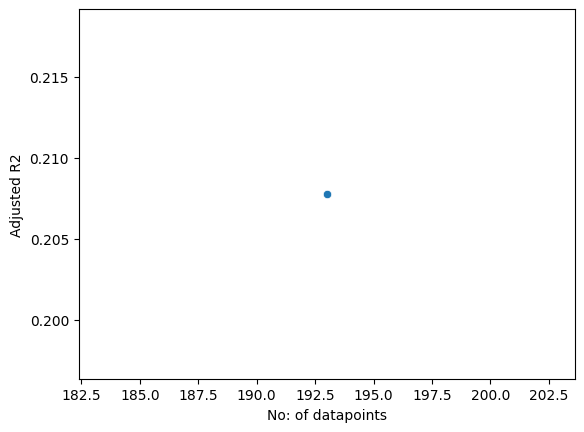

In [22]:
sns.scatterplot(y = adj_r2_calculated_, x= datapoint_count) 
plt.ylabel('Adjusted R2')
plt.xlabel('No: of datapoints')

### Relationship between the Adjusted R2 and the p-value
p-value less than 0.01 leads to better Adjusted R2 values. 

In [23]:
result = result[result['Adjusted R2'] > 0]
sns.scatterplot(y = result['Model Slope pvalue'], x= result['Datapoint Count']) 
plt.ylabel('Adjusted R2')
plt.xlabel('p_value_slope')

NameError: name 'result' is not defined

In [24]:
result = result[result['Adjusted R2'] > 0]
sns.scatterplot(y = result['Adjusted R2'], x= result['Model Slope pvalue']) 
plt.ylabel('Adjusted R2')
plt.xlabel('p_value_slope')

NameError: name 'result' is not defined

### Residual of the Y and X plots

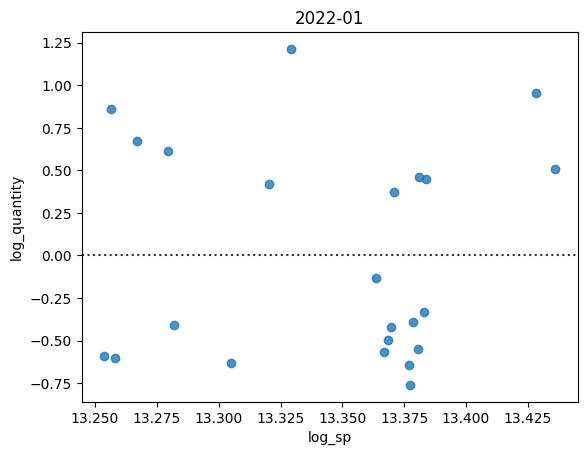

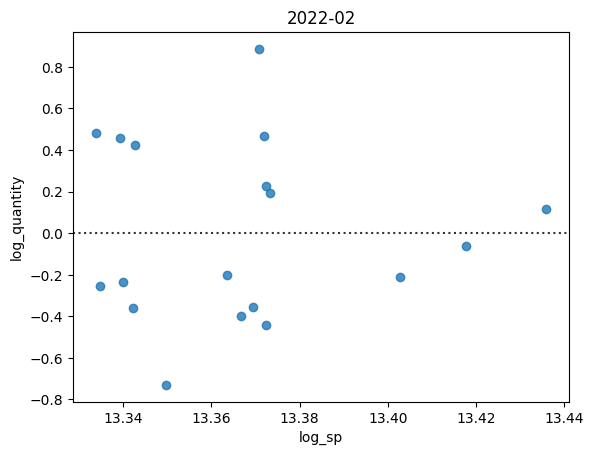

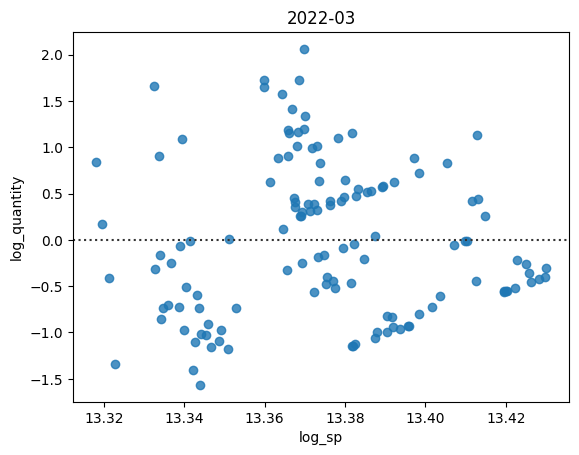

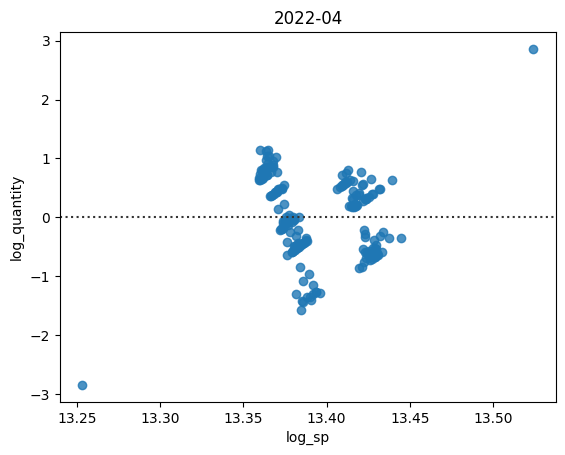

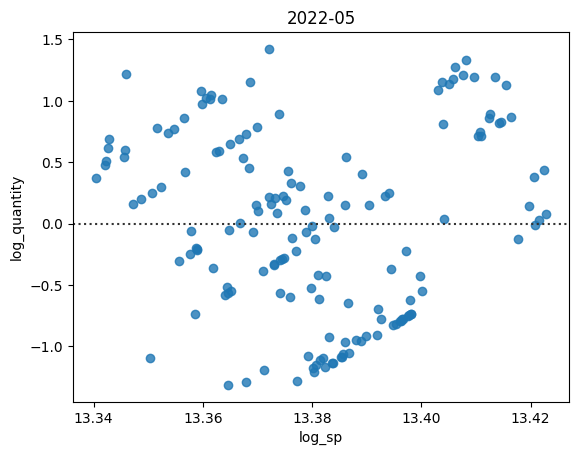

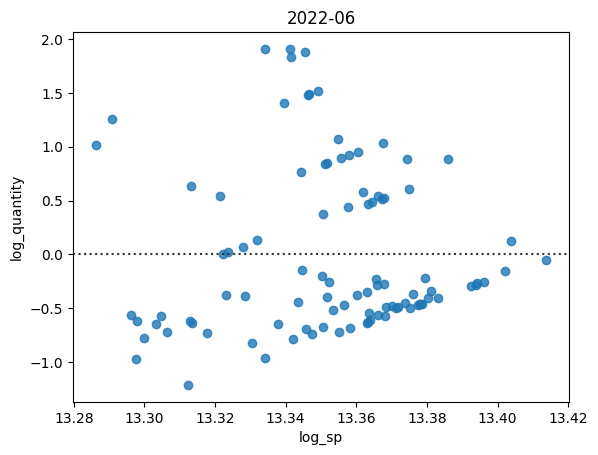

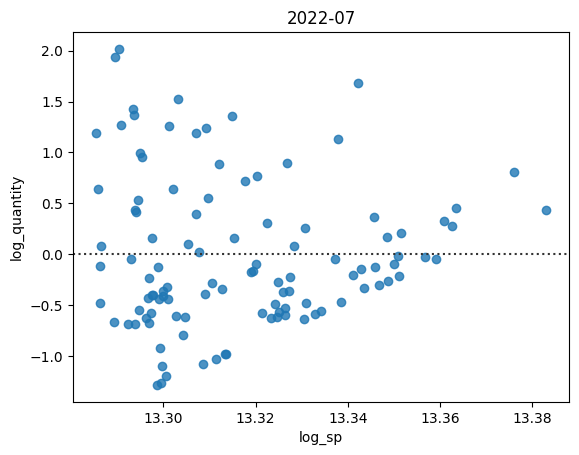

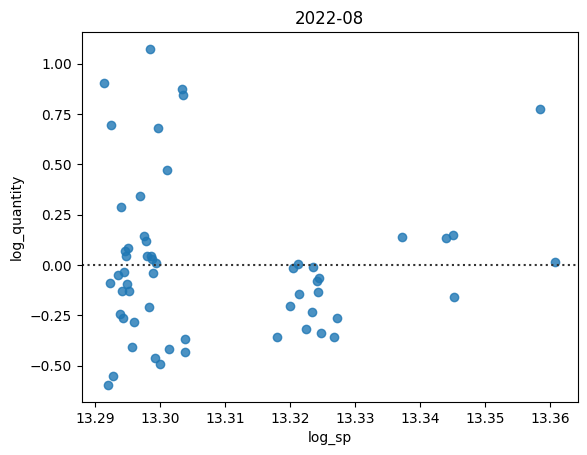

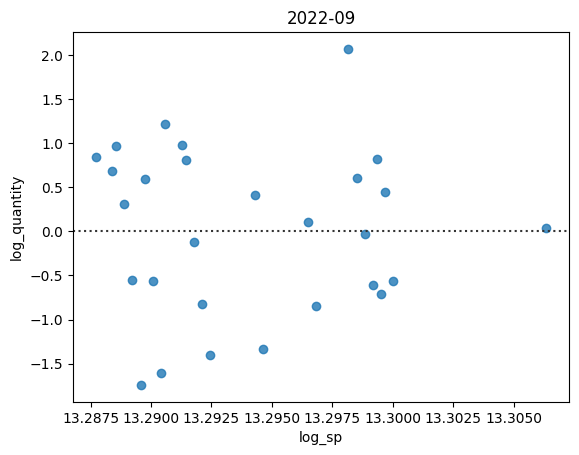

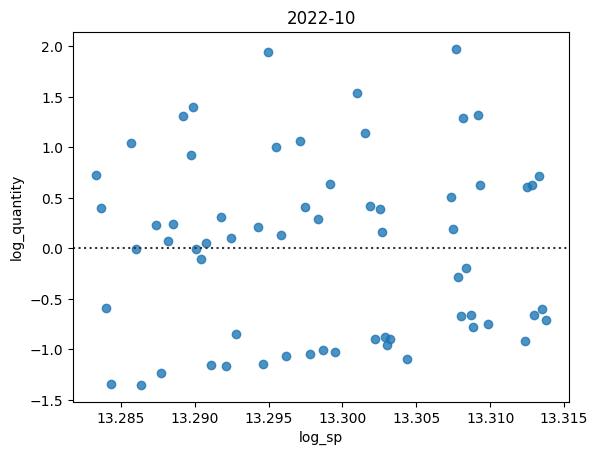

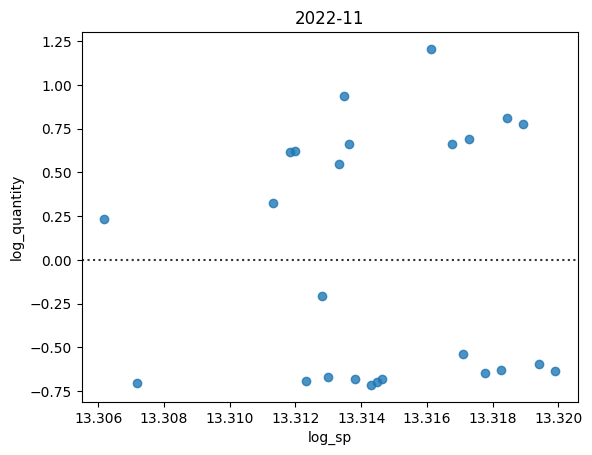

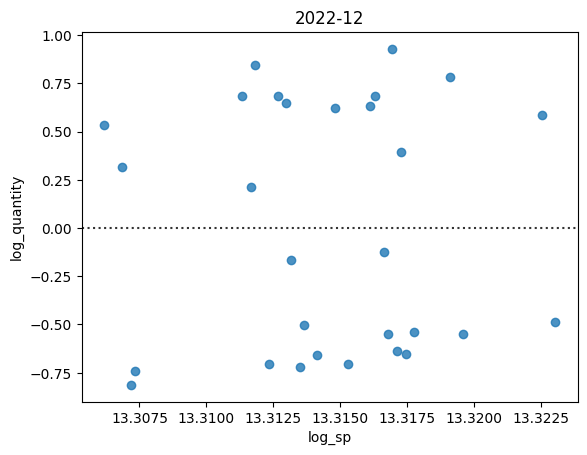

In [25]:
slopes = []
intercepts = []
r2 = []

for ym in df1.year_month.unique():
    filtered = df1[df1['year_month'] == ym]

    x_ = np.array(filtered['log_sp']).reshape((-1, 1))
    y_ = np.array(filtered['log_quantity']) 

    try: 
        x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)

        model = LinearRegression().fit(x_, y_)

        r_sq = model.score(x__, y_)
        slope = model.coef_[0]
        intercept = model.intercept_

        plt.title('{}'.format(ym))

        x_plot= np.array([13.2,13.3, 13.4, 13.5])
        y_plot= slope*x_plot + intercept
        


        sns.residplot(y = filtered['log_quantity'], x= filtered['log_sp'])
        plt.show()

        slopes.append(slope)
        intercepts.append(intercept)
        r2.append(r_sq)
        equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))


    except Exception as e: 
        continue

### May month investigation

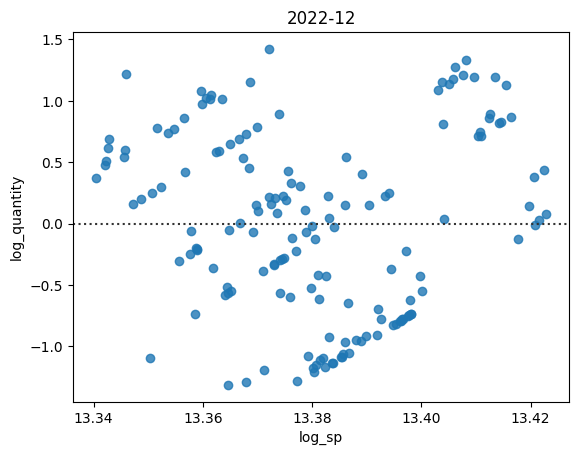

0


In [26]:
df1['predicted'] = slope * df1['log_sp'] + intercept
df1['residuals'] = df1['predicted'] - df1['log_quantity']
filtered = df1[df1['year_month'] == '2022-05']
x_ = np.array(filtered['log_sp']).reshape((-1, 1))
y_ = np.array(filtered['log_quantity']) 

try: 
    x__ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_)

    model = LinearRegression().fit(x_, y_)

    r_sq = model.score(x__, y_)
    slope = model.coef_[0]
    intercept = model.intercept_

    plt.title('{}'.format(ym))

    x_plot= np.array([13.2,13.3, 13.4, 13.5])
    y_plot= slope*x_plot + intercept



    sns.residplot(y = filtered['log_quantity'], x= filtered['log_sp'])
    plt.show()

    slopes.append(slope)
    intercepts.append(intercept)
    r2.append(r_sq)
    equations.append('{a} * x * e^{b}'.format(a=round(slope,2), b=round(intercept,2)))


except Exception as e: 
    print(0)

### Validation of the demand functions

In [27]:
demand = []
for val in range(550000, 750000,10000):
    demand_func =  np.exp(117.93)* val**(-8.78)
    demand.append(demand_func)
    # print(round(demand_func,2))

In [28]:
x_range = range(550000,750000,10000)
y_range = np.exp(272.22)* val**(-20.37)

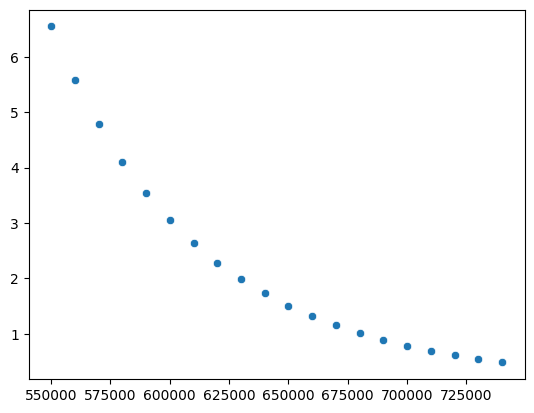

In [29]:
sns.scatterplot(x=x_range, y= demand)
plt.show()